<h1 style="background-color:#FF45D7; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Metadata
</h1>

<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Customer Data Base
</h2>

- *carID* - An attribute that contains an identifier for each car;
- *Brand* -  The car’s main brand (e.g. Ford, Toyota);
- *model* -  The car model;
- *year* -  The year of Registration of the Car;
- *mileage* - The total reported distance travelled by the car (inmiles);
- *tax* - The amount of road tax (in £) that, in 2020, wasapplicable to the car in question;
- *fuelType* - Type of Fuel used by the car (Diesel, Petrol, Hybrid,Electric);
- *mpg* - Average Miles per Gallon;
- *engineSize* - Size of Engine in liters (Cubic Decimeters);
- *paintQuality%* - The mechanic’s assessment of the cars’ overall paintquality and hull integrity (filled by the mechanicduring evaluation);
- *previousOwners* - Number of previous registered owners of the vehicle.
- *hasDamage* - Boolean marker filled by the seller at the time ofregistration stating whether the car is damaged or not;
- *price* The car’s price when purchased by Cars 4 You (in £);




In [3]:
#general imports that we will need will almost always use - it is a good practice to import all libraries at the beginning of the notebook or script
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

# data partition
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import lasso_path, SGDRegressor


# embedded methods
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import TargetEncoder, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import ElasticNet
from sklearn.compose import TransformedTargetRegressor


#set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)


In [4]:
# path to folder
df_train = pd.read_csv("C:/Users/mariana/Documents/Machine Learning/DataProject/train.csv", delimiter=',', header=0, decimal='.', quotechar='"')

In [5]:
#divinding into X and y, as well as validation set and training set
X_test = pd.read_csv("C:/Users/mariana/Documents/Machine Learning/DataProject/test.csv", delimiter=',', header=0, decimal='.', quotechar='"')
# setting 'carID' as index
df_train.set_index('carID', inplace = True)
X_test.set_index('carID', inplace = True)


<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
1. Data Pre-processing and Cleaning
</h2>

<h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
.shape, .head() and .tail() visualizations
</h3>

In [6]:
df_train.shape, X_test.shape

((75973, 13), (32567, 12))

In [7]:
df_train.head() #Checking the first rows of the dataset df_train

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [8]:
X_test.head() #Checking the first rows of the dataset X_test

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


In [9]:
df_train.tail() #Checking the last rows of the dataset df_train

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
37194,Mercedes,C Class,2015.0,13498,Manual,14480.0,etrol,125.0,53.3,2.0,78.0,0.0,0.0
6265,Audi,Q3,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.9,2.0,38.0,2.0,0.0
54886,Toyota,Aygo,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.0,1.0,57.0,3.0,0.0
860,Audi,Q3,2015.0,12990,Manual,69072.0,iesel,125.0,60.1,2.0,74.0,2.0,0.0
15795,Ford,Fiesta,2018.0,10495,Manual,16709.0,Petro,145.0,64.2,1.1,38.0,1.0,0.0


In [10]:
X_test.tail() #Checking the last rows of the dataset X_test

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
105775,VW,Tiguan,2017.0,Manual,27575.00000,Petrol,145.0,46.3,1.4,94.0,1.0,0.0
81363,BMW,X2,2020.0,Automatic,1980.00000,Petrol,145.0,34.0,2.0,39.0,3.0,0.0
76833,Audi,Q5,2019.0,Semi-Auto,8297.00000,Diesel,145.0,38.2,2.0,88.0,4.0,0.0
91768,Mercedes,A Class,2019.0,Manual,-50755.21023,Petrol,145.0,28.5,1.3,81.0,1.0,0.0
99627,Toyota,Yaris,2017.0,Automatic,11071.00000,Petrol,30.0,58.0,1.3,98.0,4.0,0.0


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75973 entries, 69512 to 15795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           74452 non-null  object 
 1   model           74456 non-null  object 
 2   year            74482 non-null  float64
 3   price           75973 non-null  int64  
 4   transmission    74451 non-null  object 
 5   mileage         74510 non-null  float64
 6   fuelType        74462 non-null  object 
 7   tax             68069 non-null  float64
 8   mpg             68047 non-null  float64
 9   engineSize      74457 non-null  float64
 10  paintQuality%   74449 non-null  float64
 11  previousOwners  74423 non-null  float64
 12  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 8.1+ MB


 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
 Data types, duplicate/missing/unique values, typecasting, feature stats
</h3>

### **Data Types and Typecasting**

In [12]:
df_train.dtypes #Checking the datatypes of each feature in the dataset df_train

Brand              object
model              object
year              float64
price               int64
transmission       object
mileage           float64
fuelType           object
tax               float64
mpg               float64
engineSize        float64
paintQuality%     float64
previousOwners    float64
hasDamage         float64
dtype: object

'year' should be a datetime object. 'previousOwnwers' is also portrayed on the wrong data type, as it should be an Integer. The remainder seem to be correctly assigned

In [13]:
(df_train['hasDamage']).isna().sum()

np.int64(1548)

In [14]:
#correcting the data types
df_train['year']=pd.to_datetime(df_train['year'], format='%Y')
df_train["year"] = df_train["year"].dt.year
X_test['year']=pd.to_datetime(X_test['year'], format='%Y')
X_test["year"] = X_test["year"].dt.year

df_train['previousOwners'] = df_train['previousOwners'].apply(lambda x: int(x) if pd.notna(x) else x)
X_test['previousOwners'] = X_test['previousOwners'].apply(lambda x: int(x) if pd.notna(x) else x)

df_train['hasDamage'] = df_train['hasDamage'].apply(lambda x: False if pd.isna(x) else True)
X_test['hasDamage'] = X_test['hasDamage'].apply(lambda x: False if pd.isna(x) else True)



### **Missing Values**

In [15]:
df_train.replace("", np.nan, inplace=True) #Replacing empty strings with NaN values
df_train.isna().sum() #Checking the number of missing values in each feature of the dataset X

Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage            0
dtype: int64

In [16]:
X_test.replace("", np.nan, inplace=True) #Replacing empty strings with NaN values
X_test.isna().sum() #Checking the number of missing values in each feature of the

Brand              649
model              650
year               653
transmission       623
mileage            689
fuelType           656
tax               3308
mpg               3288
engineSize         628
paintQuality%      625
previousOwners     597
hasDamage            0
dtype: int64

<span style="color:red">The missing values on all features have to be handled!</span>


### **Duplicated Values**

In [17]:

print("\nDuplicated values:", df_train.duplicated().sum())


Duplicated values: 4


The training set has 11 duplicated lines. Its' presence is insignificant, therefore we can drop them.

In [18]:
df_train = df_train.drop_duplicates()
print("\nDuplicated values:", df_train.duplicated().sum())


Duplicated values: 0


In [19]:
print("\nDuplicated values:", X_test.duplicated().sum())



Duplicated values: 0


### **Numerical Variables Statistics**

In [20]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,74478.0,2017.091785,2.211158,1970.000000,2016.0,2017.0,2019.0,2024.000000
price,75969.0,16882.001922,9737.075658,450.000000,10200.0,14699.0,20950.0,159999.000000
mileage,74507.0,23004.761128,22130.041696,-58540.574478,7423.5,17301.0,32428.0,323000.000000
tax,68067.0,120.328500,65.522046,-91.121630,125.0,145.0,145.0,580.000000
mpg,68045.0,55.152286,16.497834,-43.421768,46.3,54.3,62.8,470.800000
engineSize,74453.0,1.660161,0.573464,-0.103493,1.2,1.6,2.0,6.600000
paintQuality%,74445.0,64.591773,21.020975,1.638913,47.0,65.0,82.0,125.594308
previousOwners,74419.0,1.994948,1.464919,-2.000000,1.0,2.0,3.0,6.000000


### **Categorical Features Unique Values**

Checking if all the unique values of the categorical features are appropriate.

In [21]:
for var in df_train.columns:
    if df_train[var].dtype == 'object':
        print(f"{var} unique values: {df_train[var].unique()} \n")

Brand unique values: ['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot'] 

model unique values: [' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'
 ' 5 Series' ' Aygo' ' 4 Series' ' SLK' ' Viva' ' T-Roc' 'Focus'
 ' EcoSport' ' Tucson' ' EcoSpor' nan ' X-CLASS' ' CL Class' ' IX20'
 '

We observe that there are typos present on all categorical variables. We have to get them fixed in order to understand the data better and clear out inconsistencies.


In [22]:
for var in X_test.columns:
    if X_test[var].dtype == 'object':
        print(f"{var} unique values: {X_test[var].unique()} \n")

Brand unique values: ['Hyundai' 'VW' 'BMW' 'Opel' 'Ford' 'Mercedes' 'Skoda' 'Toyot' 'Toyota'
 'Audi' nan 'For' 'Ope' 'toyota' 'vw' 'hyundai' 'MW' 'SKODA' 'ord' 'udi'
 'bmw' 'V' 'BM' 'HYUNDAI' 'OPEL' 'mercedes' 'audi' 'Mercede' 'pel' 'opel'
 'FORD' 'yundai' 'ford' 'Aud' 'oyota' 'MERCEDES' 'ercedes' 'AUDI' 'koda'
 'Hyunda' 'W' 'skoda' 'Skod' 'ercede' 'TOYOTA' 'ERCEDES' 'kod' 'ORD' 'v'
 'ud' 'M' 'FOR' 'for' 'MERCEDE' 'YUNDAI' 'PEL' 'ope' 'or' 'TOYOT' 'hyunda'
 'oyot' 'UDI' 'mw' 'pe' 'bm'] 

model unique values: [' I30' ' Tiguan' ' 2 Series' ' Grandland X' '1 Series' ' Fiesta' ' X1'
 ' B Class' ' Focus' ' Superb' ' 5 Series' ' C Class' ' Up' ' Aygo' 'Golf'
 ' M CLAS' ' Land Cruiser' ' TT' ' Adam' ' Zafira' ' E Class' ' Golf'
 ' 3 Series' ' IX20' ' A4' ' Yaris' ' Passat' ' I10' ' Mokka X'
 ' EcoSport' ' 1 Series' ' 4 Series' ' A7' ' Corsa' ' Kuga' ' Grand C-MAX'
 ' Q2' ' M4' ' A Class' ' RAV4' ' Fabia' ' Insignia' ' A1' ' X6' ' Meriva'
 ' Caravelle' ' Octavia' ' Auris' ' X-CLASS' ' FOCUS' '

We designed a function to automatically correct the typos found in the training and test data set:

In [23]:
def normalize_data(x):
    x = str(x)
    x = x.lower()
    x = x.replace("_", "")
    x = x.replace("-", "")
    x = x.replace(" ", "")
    if x == "nan":
        return np.nan
    return x


def correct_missing_letters(value, valid_list, max_missing=2):
    """
    corrects values with missing letters based on valid_list
    """
    best_match = value
    smallest_diff = 999
    if pd.isna(value):  # <- ignores NaN
        return np.nan
    for ref in valid_list:
        # absolute length difference
        len_diff = abs(len(ref) - len(value))
        if len_diff == 0 or len_diff > max_missing:
            continue  # ignora se igual ou diferença > limite

        # verificar se o valor é subsequência do nome correto (mantendo ordem)
        it = iter(ref)
        is_subseq = all(ch in it for ch in value)

        if is_subseq and len_diff < smallest_diff:
            smallest_diff = len_diff
            best_match = ref

    return best_match

valid_list = []


In [24]:
#correcting 'Brand' feature
valid_list = ["bmw", "mercedes", "ford", "hyundai", "audi", "toyota", "opel", "skoda", "vw"]
df_train["Brand"] = df_train["Brand"].apply(normalize_data)
df_train["Brand"] = df_train["Brand"].apply(lambda x: correct_missing_letters(x, valid_list))


X_test["Brand"] = X_test["Brand"].apply(normalize_data)
X_test["Brand"] = X_test["Brand"].apply(lambda x: correct_missing_letters(x, valid_list))

df_train[df_train["Brand"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan
X_test[X_test["Brand"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other", " None"])] = np.nan

print(df_train["Brand"].unique())



['vw' 'toyota' 'audi' 'ford' 'bmw' 'skoda' 'opel' 'mercedes' 'hyundai' nan]


In [25]:
#correcting 'fuelType' feature
valid_list = ["diesel", "petrol", "hybrid", "electric","other"]
df_train["fuelType"] = df_train["fuelType"].apply(normalize_data)
df_train["fuelType"] = df_train["fuelType"].apply(lambda x: correct_missing_letters(x, valid_list))

X_test["fuelType"] = X_test["fuelType"].apply(normalize_data)
X_test["fuelType"] = X_test["fuelType"].apply(lambda x: correct_missing_letters(x, valid_list))
X_test["fuelType"].unique()

df_train[df_train["fuelType"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan
X_test[X_test["fuelType"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan

print(df_train["fuelType"].unique())


['petrol' 'diesel' 'hybrid' nan 'other' 'electric']


In [26]:
#correcting 'model' feature
car_models = [
"GOLF", "POLO", "PASSAT", "TIGUAN", "TIGUANALLSPACE", "TOUAREG", "TROC", "TCROSS", "ARTEON",
"SHARAN", "JETTA", "CC", "CARAVELLE", "CALIFORNIA", "CADDY", "CADDYMAXI", "TOURAN", "GOLFSV",
"BEETLE", "SCIROCCO", "UP", "AMAROK", "EOS", "FOX", "FOCUS", "FIESTA", "MONDEO", "KUGA", "GALAXY",
"SMAX", "BMAX", "ECOSPORT", "PUMA", "TOURNEOCUSTOM", "TOURNEOCONNECT", "KA", "KAPLUS", "CMAX",
"GRANDCMAX", "EDGE", "MUSTANG", "GRANDTOURNEOCONNECT", "FUSION", "STREETKA", "RANGER", "ESCORT",
"CORSA", "ASTRA", "INSIGNIA", "MOKKA", "ZAFIRA", "VIVA", "MERIVA", "ADAM", "COMBOLIFE", "CROSSLANDX",
"GRANDLANDX", "GTC", "ANTARA", "VIVARO", "VECTRA", "AGILA", "TIGRA", "CASCADA", "AMPERA", "SERIES1",
"SERIES2", "SERIES3", "SERIES4", "SERIES5", "SERIES6", "SERIES7", "SERIES8", "X1", "X2", "X3", "X4",
"X5", "X6", "X7", "Z3", "Z4", "M2", "M3", "M4", "M5", "M6", "A1", "A2", "A3", "A4", "A5", "A6", "A7",
"A8", "Q2", "Q3", "Q5", "Q7", "Q8", "S3", "S4", "S5", "S8", "RS3", "RS4", "RS5", "RS6", "SQ5", "SQ7",
"TT", "R8", "ACLASS", "BCLASS", "CCLASS", "ECLASS", "SCLASS", "CLACLASS", "CLSCLASS", "GLACLASS",
"GLBCLASS", "GLCCLASS", "GLECLASS", "GLSCLASS", "GLCLASS", "GCLASS", "VCLASS", "XCLASS", "SLCLASS",
"SLKCLASS", "MCLASS", "CLK", "CLCLASS", "CLCCLASS", "MERCEDES200", "MERCEDES230", "MERCEDES220",
"YARIS", "AYGO", "COROLLA", "CHR", "AVENSIS", "PRIUS", "RAV4", "HILUX", "VERSO", "SUPRA",
"LANDCRUISER", "CAMRY", "PROACEVERSO", "URBANCRUISER", "AURIS", "GT86", "I10", "I20", "I30", "I40",
"I800", "IONIQ", "KONA", "TUCSON", "SANTAFE", "GETZ", "IX20", "IX35", "VELOSTER", "ACCENT",
"TERRACAN", "FABIA", "OCTAVIA", "SUPERB", "KAROQ", "KODIAQ", "KAMIQ", "YETI", "SCALA", "RAPID",
"CITIGO", "ROOMSTER", "LEON", "ATECA", "TOLEDO", "ARONA", "IBIZA", "ALHAMBRA", "SHUTTLE", "KADJAR", "IQ"
]

valid_list_models = [x.lower() for x in car_models]
df_train["model"] = df_train["model"].apply(normalize_data)
df_train["model"] = df_train["model"].apply(lambda x: correct_missing_letters(x, valid_list_models))
#df_train["models"].unique()
X_test["model"] = X_test["model"].apply(normalize_data)
X_test["model"] = X_test["model"].apply(lambda x: correct_missing_letters(x, valid_list_models))
X_test["model"].unique()

manual_corrections = {
    'ka+' : 'ka',
    'slk' : 'slkclass',
    '7series' : 'series7',
    '230' : 'mercedes230',
    'yetioutdoor' : 'yeti',
    'yetioutdoo' : 'yeti',
    'zafiratoure' : 'zafira',
    '220' : 'mercedes220',
    '6series' : 'series6',
    '4series' : 'series4',
    'zafiratourer' : 'zafira',
    '2series' : 'series2',
    '1serie' : 'series1',
    '1series' : 'series1',
    'rclass' : 'eclass',
    '7serie' : 'series7',
    '180' : 'mercedes200',
    'caddylife' : 'caddy',
    '5series' : 'series5',
    '5serie' : 'series5',
    '3series' : 'series3',
    '6serie' : 'series6',
    '3serie' : 'series3',
    '2serie' : 'series2',
    '4serie' : 'series4',
    '200' : 'mercedes200',
    'sl' : 'slclass',
    'transittourneo' : 'tourneoconnect',
    'amica' : 'agila',
    'mokkax' : 'mokka',
    'caddymaxilife' : 'caddymaxi',
    '8series' : 'series8',
    'versos' : 'verso',
    'caddymaxilif' : 'caddymaxi',
    '8serie' : 'series8',
    'rs7' : 'rs6',
    'slk': 'slc',
    'zafiratourer':'zafira'
}
df_train["model"] = df_train["model"].replace(manual_corrections)
X_test["model"] = X_test["model"].replace(manual_corrections)

df_train[df_train["model"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan
X_test[X_test["model"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan

In [27]:
#correcting 'transmission' feature

valid_list = ["automatic", "manual", "semiauto", 'unknown']
df_train["transmission"] = df_train["transmission"].apply(normalize_data)
df_train["transmission"] = df_train["transmission"].apply(lambda x: correct_missing_letters(x, valid_list))
df_train["transmission"].unique()

df_train.loc[df_train["transmission"].isin(["nan", "none", "null", "unknown", "UNKNOWN", "nknown", "nknow", "Other"]), "transmission"] = np.nan
X_test.loc[X_test["transmission"].isin(["nan", "none", "null", "unknown", "UNKNOWN", "nknown", "nknow", "Other"]), "transmission"] = np.nan



### **Numerical Features Unique Values**

Checking if all the unique values of the Numerical features are appropriate.

In [28]:
for var in df_train.columns:
    if df_train[var].dtype != 'object':
        print(f"{var} unique values: {df_train[var].unique()} \n")

year unique values: [2016. 2019. 2018. 2014. 2017. 2020. 2013.   nan 2015. 2023. 2011. 2012.
 2003. 2009. 2007. 2005. 2004. 2010. 2008. 2024. 2006. 2001. 2000. 2002.
 2022. 1996. 1998. 1970. 1999. 1997.] 

price unique values: [22290 13790 24990 ... 33606 16809 25785] 

mileage unique values: [28421.  4589.  3624. ... 13613. 52134. 69072.] 

tax unique values: [         nan 145.          30.          20.         150.
 160.         -56.19320154   0.         125.         200.
 250.         135.         300.         205.         260.
 326.02823317 325.         -45.78061049 265.         305.
 303.14889146 235.         299.47350391 240.         165.
 140.         540.         155.         220.         120.
 330.         290.48678508 -20.24107949 -18.33074314 327.91577835
 270.         115.         185.         316.48718937 570.
 -49.15354066 316.29630636 -60.6840948  555.         277.38425448
 -91.12163048  10.         315.         190.         -31.91494466
 230.         -43.24208237 294.84

Some features have negative values where it does not make sense to exist. 

For 'previousOwners' we will substitute the negatives for 0, as it is the most likely value to be set.

In [29]:
#correcting negative previousOwners values
df_train["previousOwners"] = df_train["previousOwners"].clip(lower=0)
X_test["previousOwners"] = X_test["previousOwners"].clip(lower=0)

df_train["previousOwners"].unique()


array([ 4.,  1.,  0.,  3.,  2., nan,  6.])

For 'tax', 'mileage', 'mpg' and 'engineSize' the incorrect values are nearly insignificant, consequently they are removable. We proceeded with caution because by keeping all values above zero, NaNs were discarded...

In [30]:

df_train.loc[df_train["tax"] < 0, "tax"] = np.nan
df_train.loc[df_train["engineSize"] <= 0, "engineSize"] = np.nan
df_train.loc[df_train["mileage"] < 0, "mileage"] = np.nan
df_train.loc[df_train["mpg"] <= 0, "mpg"] = np.nan

# Apply the same logic to the test set
X_test.loc[X_test["tax"] < 0, "tax"] = np.nan
X_test.loc[X_test["engineSize"] <= 0, "engineSize"] = np.nan
X_test.loc[X_test["mileage"] < 0, "mileage"] = np.nan
X_test.loc[X_test["mpg"] <= 0, "mpg"] = np.nan





'hasDamage' is a dummy variable. For this reason, we will consider that the people who filled the spot on its' column are the ones with damage and the rest (Nan values) are cars not damaged.

In [31]:
df_train["has_reportedDamage"]=df_train["hasDamage"].map(lambda x: 1 if x==True else 0)
X_test["has_reportedDamage"]=X_test["hasDamage"].map(lambda x: 1 if x==True else 0)


In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75969 entries, 69512 to 15795
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               74448 non-null  object 
 1   model               74452 non-null  object 
 2   year                74478 non-null  float64
 3   price               75969 non-null  int64  
 4   transmission        73711 non-null  object 
 5   mileage             74138 non-null  float64
 6   fuelType            74458 non-null  object 
 7   tax                 67689 non-null  float64
 8   mpg                 68009 non-null  float64
 9   engineSize          74189 non-null  float64
 10  paintQuality%       74445 non-null  float64
 11  previousOwners      74419 non-null  float64
 12  hasDamage           75969 non-null  bool   
 13  has_reportedDamage  75969 non-null  int64  
dtypes: bool(1), float64(7), int64(2), object(4)
memory usage: 8.2+ MB


### **Metric/Non-Metric Features**

Lets divide our features in numeric and non-numeric to treat them accordingly

In [33]:
cat_features=["Brand", "model", "fuelType", "transmission", "hasDamage"]
metric_features=df_train.columns.drop(cat_features).tolist()

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75969 entries, 69512 to 15795
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               74448 non-null  object 
 1   model               74452 non-null  object 
 2   year                74478 non-null  float64
 3   price               75969 non-null  int64  
 4   transmission        73711 non-null  object 
 5   mileage             74138 non-null  float64
 6   fuelType            74458 non-null  object 
 7   tax                 67689 non-null  float64
 8   mpg                 68009 non-null  float64
 9   engineSize          74189 non-null  float64
 10  paintQuality%       74445 non-null  float64
 11  previousOwners      74419 non-null  float64
 12  hasDamage           75969 non-null  bool   
 13  has_reportedDamage  75969 non-null  int64  
dtypes: bool(1), float64(7), int64(2), object(4)
memory usage: 8.2+ MB


<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
2. Data Understanding
</h2>

 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
 Individual Variable Analysis
 <h3>

### **Histograms**

We start plotting histograms of all the numerical features.

Text(0.5, 0.98, "Numeric Variables' Histograms")

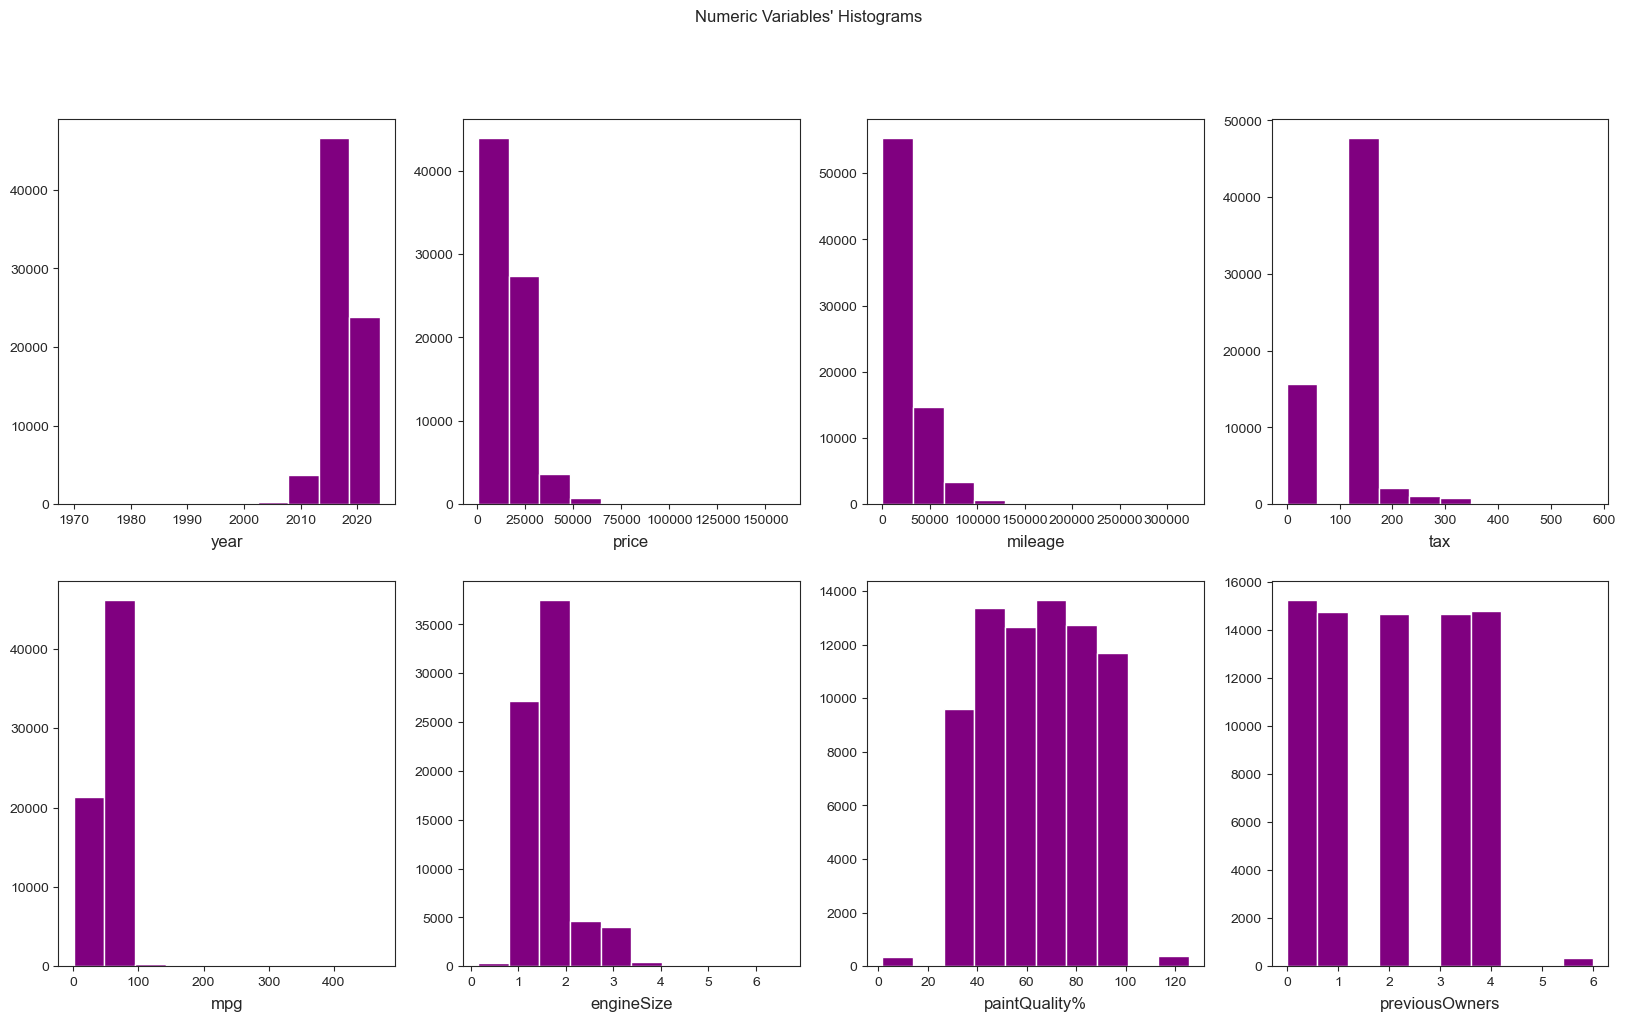

In [34]:
sp_rows = 2
sp_cols = 4


#Histograms
sns.set_style("ticks")
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(df_train[feat], color=("purple"))
    ax.set_title(feat, y=-0.13)  
# Layout
plt.suptitle("Numeric Variables' Histograms")

### **Boxplot**

We can also plot the boxplot of all the numerical features.

Text(0.5, 0.98, 'BoxPlots')

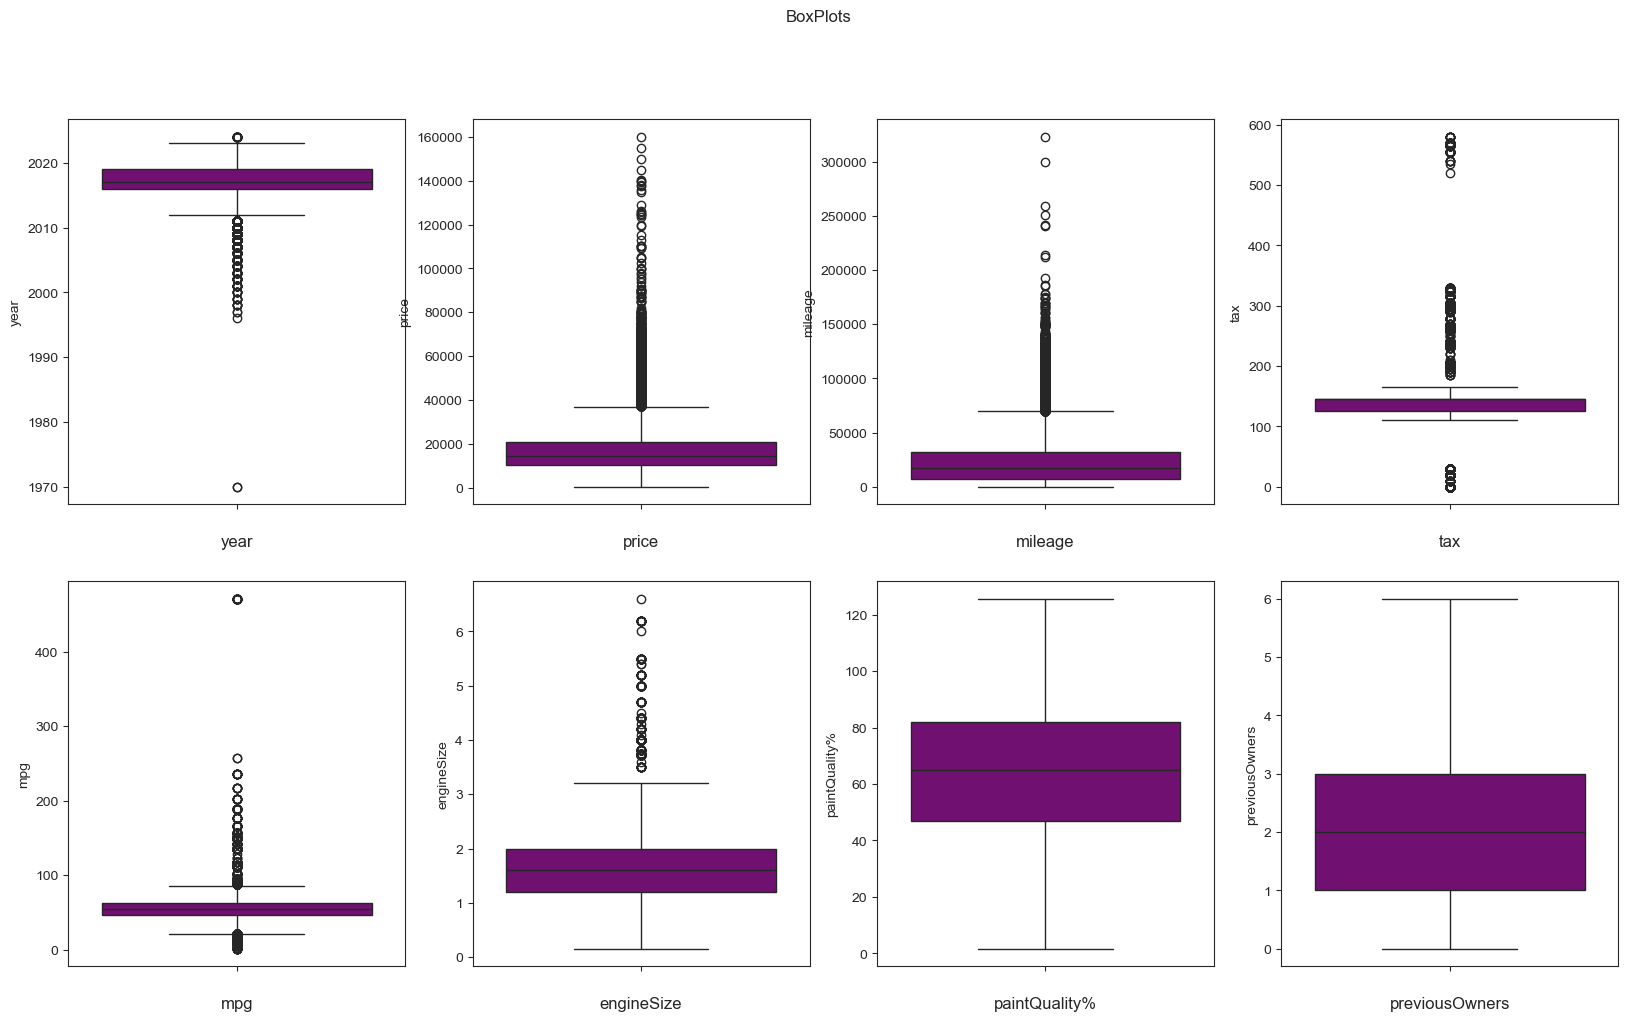

In [35]:
#boxplot
# Prepare figure. Create individual axes where each boxplot will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(y=df_train[feat],ax=ax, color=("purple"))
    ax.set_title(feat, y=-0.13) 

plt.suptitle("BoxPlots")



### **BarPlot**

For categorical features we will observe them via a Bar Plot.

Text(0.5, 0.98, "Categorical Variables' Histplot")

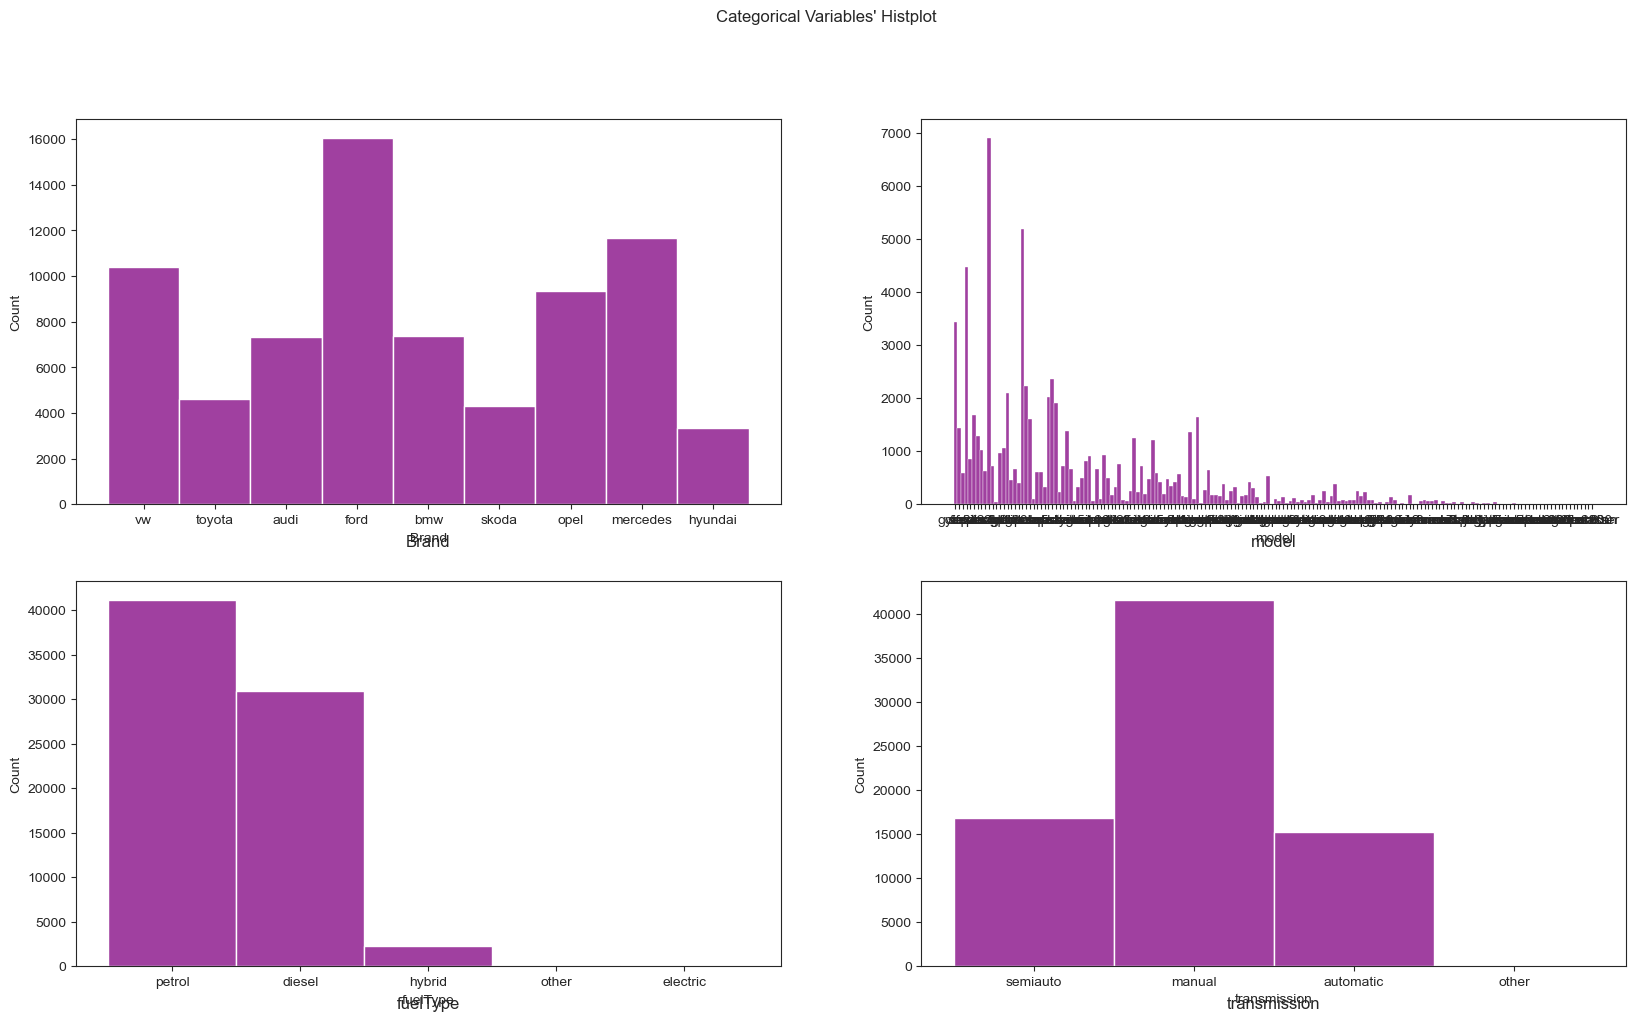

In [36]:
fig, axes = plt.subplots(2, 
                         2, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), cat_features): 
    sns.histplot(x=df_train[feat],ax=ax, color=("purple"))
    ax.set_title(feat, y=-0.13)



plt.suptitle("Categorical Variables' Histplot")

For better visualization plots we targetted important intervals.

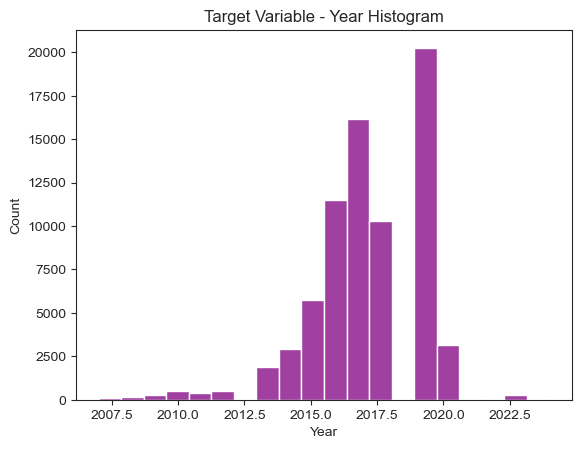

In [37]:
# Histogram of variable 'year' after 2007
sns.histplot(df_train[df_train["year"] >= 2007]["year"].astype(int), bins=20, color=("purple"))
plt.title("Target Variable - Year Histogram")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show() 

 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Multivariate Analysis
<h3>

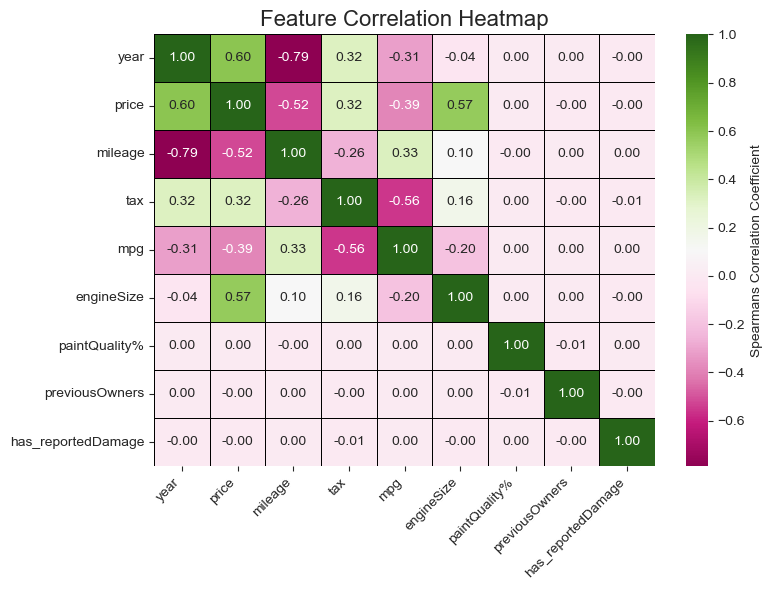

In [38]:
correlation_matrix_spearman = df_train[metric_features].corr(method='spearman')

plt.figure(figsize=(8, 6))

sns.heatmap(
    correlation_matrix_spearman,
    annot=True,     
    fmt=".2f",      
    cmap='PiYG',
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Spearmans Correlation Coefficient'}
)

plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Relationship with `price`
- **`year` ↗ `price` (ρ = 0.60)** → Newer cars tend to be more expensive.  
- **`mileage` ↘ `price` (ρ = -0.52)** → Cars with higher mileage usually have lower prices.  
- **`engineSize` ↗ `price` (ρ = 0.57)** → Larger engines are associated with higher prices.  
- **`mpg` ↘ `price` (ρ = -0.39)** → Cars with higher fuel efficiency are typically cheaper, possibly due to smaller engines or economy-focused models.  
- **`tax` ↗ `price` (ρ = 0.32)** → Higher tax values tend to correspond to higher-priced cars, likely reflecting larger or more powerful vehicles.

#### Relationships between predictors
- **`year` ↘ `mileage` (ρ = -0.79)** → Newer cars have lower mileage, a strong and expected inverse relationship.  
- **`tax` ↘ `mpg` (ρ = -0.56)** → Cars that consume less fuel (higher mpg) generally have lower taxes.  
- **`engineSize` ↗ `tax` (ρ = 0.16)** → Bigger engines tend to be associated with higher taxes.

#### Low-correlation or constant features
- **`paintQuality%`, `previousOwners`, `hasDamage`** show near-zero correlations with all other variables.  
  This could indicate:
  - Low variability or constant values in these columns, or  
  - Poor data quality (e.g., missing or improperly encoded values).

#### Key takeaways
- Strongest predictors of price: **`year`, `mileage`, and `engineSize`**.  
- Potentially irrelevant or flat features: **`paintQuality%`, `hasDamage`, and `previousOwners`** — these might be reviewed or excluded from feature selection.  
- The use of **Spearman’s rank correlation** was appropriate, as some relationships are **monotonic but not linear**.

---

By observing the Scatter Plot below we can assume these variables are strongly negatively correlated. On the other hand, for 'mileage' inferior to around 5000 (miles) we notice a large variation in 'price'.

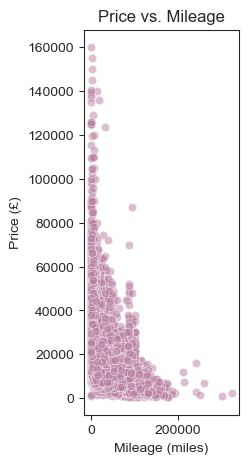

In [39]:
sns.set_style("ticks")


plt.figure(figsize=(2, 5))
sns.scatterplot(x='mileage', y='price', data=df_train, alpha=0.5, color="#B87EA1")
plt.title('Price vs. Mileage')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (£)')

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

We understand that these two features are positively correlated. The cars with the highest selling price are the most recent ones, as a whole.

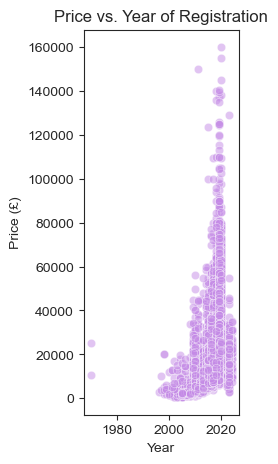

In [40]:
plt.figure(figsize=(2, 5))
sns.scatterplot(x='year', y='price', data=df_train, alpha=0.5, color='#C48AE6')
plt.title('Price vs. Year of Registration')
plt.xlabel('Year')
plt.ylabel('Price (£)')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

BMW and Mercedes have the highest median value, while VW and Audi have a large price range. Opel and Toyota appear to be the most accecible brands.

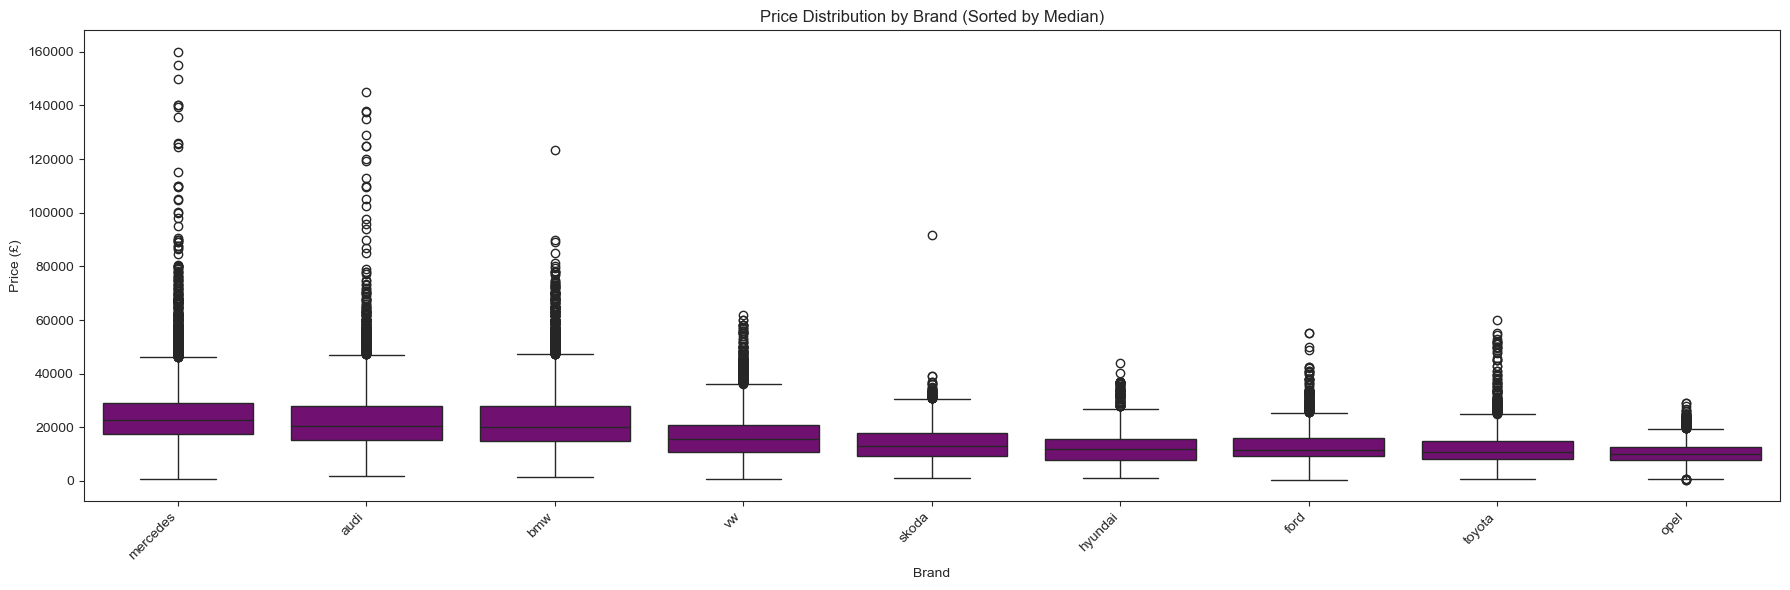

In [41]:
plt.figure(figsize=(18, 6))

median_price = df_train.groupby('Brand')['price'].median().sort_values(ascending=False)

sns.boxplot(x='Brand', y='price', data=df_train, order=median_price.index, color='purple')
plt.title('Price Distribution by Brand (Sorted by Median)')
plt.xlabel('Brand')
plt.ylabel('Price (£)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')

In [42]:
X = df_train.drop('price', axis = 1)
y = df_train['price']
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)


metric_features.remove('price')
print(metric_features)

print(X_train.shape)
print(y_train.shape)





['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'has_reportedDamage']
(53178, 13)
(53178,)


 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Outlier Analysis on Numerical Variables
<h3>

In [43]:
metric_features

['year',
 'mileage',
 'tax',
 'mpg',
 'engineSize',
 'paintQuality%',
 'previousOwners',
 'has_reportedDamage']

### IQR

Checking by the standard IQR analysis the outliers that are present in our variable.

In [44]:

for col in metric_features:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    outliers = X_train[(X_train[col] < lower) | (X_train[col] > upper)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(X_train):.2%})")
    

year: 1214 outliers (2.28%)
mileage: 2253 outliers (4.24%)
tax: 13949 outliers (26.23%)
mpg: 813 outliers (1.53%)
engineSize: 462 outliers (0.87%)
paintQuality%: 0 outliers (0.00%)
previousOwners: 0 outliers (0.00%)
has_reportedDamage: 1075 outliers (2.02%)


In [45]:
def remove_outliers_smart_v2(X_train, X_val, y_train, y_val):

    X_tr = X_train.copy()
    X_v = X_val.copy()
    y_tr = y_train.copy()
    y_v = y_val.copy()
    
    
    if 'year' in X_tr.columns:
        mask_tr = X_tr['year'] >= 1990
        mask_v = X_v['year'] >= 1990
        removed_tr = (~mask_tr).sum()
        removed_v = (~mask_v).sum()
        if removed_tr > 0 or removed_v > 0:
            print(f"\n[YEAR < 1990]")
            print(f" {removed_tr} train, {removed_v} val")
        X_tr, y_tr = X_tr[mask_tr], y_tr[mask_tr]
        X_v, y_v = X_v[mask_v], y_v[mask_v]
    

    print(f"\n[PRICE - Target]")

    mask_tr = y_tr >= 1000
    mask_v = y_v >= 1000
    print(f" Price < £1000: {(~mask_tr).sum()} train, {(~mask_v).sum()} val")
    X_tr, y_tr = X_tr[mask_tr], y_tr[mask_tr]
    X_v, y_v = X_v[mask_v], y_v[mask_v]
    
    
    upper_price = y_train.quantile(0.995)
    mask_tr = y_tr <= upper_price
    mask_v = y_v <= upper_price
    print(f" Price > £{upper_price:,.0f} (P99.5): {(~mask_tr).sum()} train, {(~mask_v).sum()} val")
    X_tr, y_tr = X_tr[mask_tr], y_tr[mask_tr]
    X_v, y_v = X_v[mask_v], y_v[mask_v]
    

    
    if 'mileage' in X_tr.columns:
        print(f"\n[MILEAGE]")
        
        upper_mileage = X_train['mileage'].quantile(0.99)
        train_above = (X_tr['mileage'] > upper_mileage).sum()
        val_above = (X_v['mileage'] > upper_mileage).sum()
        print(f" P99 = {upper_mileage:,.0f} milhas")
        print(f" Capped: {train_above} train, {val_above} val")
        X_tr['mileage'] = np.clip(X_tr['mileage'], 0, upper_mileage)
        X_v['mileage'] = np.clip(X_v['mileage'], 0, upper_mileage)
    

    if 'mpg' in X_tr.columns:
        print(f"\n[MPG]")
        # MPG muito alto (>80) é raro em carros usados normais
        q_low = X_tr['mpg'].quantile(0.005)  # Mais agressivo: 0.5% em vez de 1%
        q_high = X_tr['mpg'].quantile(0.98)  # 98% em vez de 99%
        print(f" [{q_low:.1f}, {q_high:.1f}] MPG (0.5%–98%)")
        
        train_affected = ((X_tr['mpg'] < q_low) | (X_tr['mpg'] > q_high)).sum()
        val_affected = ((X_v['mpg'] < q_low) | (X_v['mpg'] > q_high)).sum()
        print(f"  {train_affected} train, {val_affected} val")
        
        X_tr['mpg'] = np.clip(X_tr['mpg'], q_low, q_high)
        X_v['mpg'] = np.clip(X_v['mpg'], q_low, q_high)
    

    if 'tax' in X_tr.columns:
        print(f"\n[TAX]")
        upper_tax = X_train['tax'].quantile(0.98)
        train_above = (X_tr['tax'] > upper_tax).sum()
        val_above = (X_v['tax'] > upper_tax).sum()
        print(f"  P98 = £{upper_tax:.0f}")
        print(f"  Capped: {train_above} train, {val_above} val")
        X_tr['tax'] = np.clip(X_tr['tax'], 0, upper_tax)
        X_v['tax'] = np.clip(X_v['tax'], 0, upper_tax)
    

    if 'engineSize' in X_tr.columns:
        print(f"\n[ENGINE SIZE]")
        
        mask_tr = X_tr['engineSize'] <= 6.0
        mask_v = X_v['engineSize'] <= 6.0
        removed_tr = (~mask_tr).sum()
        removed_v = (~mask_v).sum()
        if removed_tr > 0 or removed_v > 0:
            print(f" Engine > 6.0L: {removed_tr} train, {removed_v} val")
        X_tr, y_tr = X_tr[mask_tr], y_tr[mask_tr]
        X_v, y_v = X_v[mask_v], y_v[mask_v]
    

    print(f"\n[Logic Validation]")
    
    
    if 'year' in X_tr.columns and 'mileage' in X_tr.columns:
        current_year = 2025  
        mask_tr = ~((current_year - X_tr['year'] <= 3) & (X_tr['mileage'] > 100000))
        mask_v = ~((current_year - X_v['year'] <= 3) & (X_v['mileage'] > 100000))
        removed_tr = (~mask_tr).sum()
        removed_v = (~mask_v).sum()
        if removed_tr > 0 or removed_v > 0:
            print(f"  {removed_tr} train, {removed_v} val")
        X_tr, y_tr = X_tr[mask_tr], y_tr[mask_tr]
        X_v, y_v = X_v[mask_v], y_v[mask_v]
    
 
    if 'mpg' in X_tr.columns and 'engineSize' in X_tr.columns:
        mask_tr = ~((X_tr['engineSize'] > 4.0) & (X_tr['mpg'] > 60))
        mask_v = ~((X_v['engineSize'] > 4.0) & (X_v['mpg'] > 60))
        removed_tr = (~mask_tr).sum()
        removed_v = (~mask_v).sum()
        if removed_tr > 0 or removed_v > 0:
            print(f": {removed_tr} train, {removed_v} val")
        X_tr, y_tr = X_tr[mask_tr], y_tr[mask_tr]
        X_v, y_v = X_v[mask_v], y_v[mask_v]
    

    print("\n" + "="*60)
    print("="*60)
    print(f"Final: {len(X_tr)} train ({100*len(X_tr)/len(X_train):.1f}%), "
          f"{len(X_v)} val ({100*len(X_v)/len(X_val):.1f}%)")
    print(f"Removed: {len(X_train) - len(X_tr)} train ({100*(len(X_train)-len(X_tr))/len(X_train):.2f}%), "
          f"{len(X_val) - len(X_v)} val ({100*(len(X_val)-len(X_v))/len(X_val):.2f}%)")
    print("="*60 + "\n")
    
    return X_tr, X_v, y_tr, y_v


X_train_treated, X_val_treated, y_train_treated, y_val_treated = remove_outliers_smart_v2(
    X_train, X_val, y_train, y_val
)



[YEAR < 1990]
 1044 train, 449 val

[PRICE - Target]
 Price < £1000: 21 train, 6 val
 Price > £59,822 (P99.5): 260 train, 102 val

[MILEAGE]
 P99 = 98,000 milhas
 Capped: 491 train, 209 val

[MPG]
 [23.5, 80.7] MPG (0.5%–98%)
  1094 train, 475 val

[TAX]
  P98 = £260
  Capped: 776 train, 278 val

[ENGINE SIZE]
 Engine > 6.0L: 1237 train, 523 val

[Logic Validation]

Final: 50616 train (95.2%), 21711 val (95.3%)
Removed: 2562 train (4.82%), 1080 val (4.74%)



Setting the training set to its' form with the outlier treatment.

In [46]:
X_train=X_train_treated
X_val=X_val_treated
y_train=y_train_treated
y_val=y_val_treated

 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Missing Values Treatment
 <h3>

In [47]:
#slight correction of NaN values that werent marked as real NaN
for df in [X_train, X_val, X_test]:
    df.replace(["nan", "NaN", "None", "", " "], np.nan, inplace=True)

Tax can depend on the size of the car (understandable by the 'model', if SUV, town car, etc.) and on the 'fuelType' they use, since nowadays, electric cars have several benefits.

Similar cars, by the same manufacturer, usually have the same 'mileage'. Consequently, let us use that knowledge to fill in the missing values. On the other hand, KNN filling would create a bias due to the high skewness in the distribution of this variable.

The type of engine depends solely on the manufacturer of the car

The measure of 'mpg' (miles per galon) is highly related to which fuel type the car is using, the type of car and the size of the engine.

In [48]:
# min_samples = 5


# # --- Estatísticas para 'mpg' e 'tax' ---

# # Nível 1: Brand, model, fuelType. FIX: Retorna pd.Series de NaNs para grupos pequenos.
# group_median_full_mpg_tax = (
#     X_train.groupby(["Brand", "model", "fuelType"])[["mpg", "tax"]]
#     .apply(lambda x: x.median() if len(x) >= min_samples else pd.Series({'mpg': np.nan, 'tax': np.nan}))
# )

# # Nível 2: Brand, fuelType (Calculamos Series separadas para facilitar o .get() nos fallbacks)
# group_median_tax_brandfuel = X_train.groupby(["Brand", "fuelType"])["tax"].median()
# group_median_mpg_brandfuel = X_train.groupby(["Brand", "fuelType"])["mpg"].median()

# # Nível 3: Global
# global_tax_median = X_train["tax"].median()
# global_mpg_median = X_train["mpg"].median()


# # --- Estatísticas para 'engineSize' ---
# # Nível 1: Brand, model
# group_median_engine_full = (
#     X_train.groupby(["Brand", "model"])["engineSize"]
#     .apply(lambda x: x.median() if len(x) >= min_samples else np.nan)
# )

# # Nível 2: Brand
# group_median_engine_brand = X_train.groupby("Brand")["engineSize"].median()

# # Nível 3: Global
# global_engine_median = X_train["engineSize"].median()

# # --- Estatísticas para 'mileage' (Global) ---
# global_mileage_median = X_train["mileage"].median()


# def fill_tax(row):
#     if pd.notna(row["tax"]):
#         return row["tax"]
    
#     key_full = (row["Brand"], row["model"], row["fuelType"])
    
#     # 1. Tenta a mediana mais específica (Brand, model, fuelType)
#     if key_full in group_median_full_mpg_tax.index:
#         val = group_median_full_mpg_tax.loc[key_full, 'tax']
#     else:
#         val = np.nan # Grupo não existe no índice
    
#     if pd.isna(val):
#         key_brandfuel = (row["Brand"], row["fuelType"])
#         # 2. Tenta a mediana mais geral (Brand, fuelType)
#         val = group_median_tax_brandfuel.get(key_brandfuel, global_tax_median)
        
#     # 3. Usa a mediana global como fallback final
#     return val if pd.notna(val) else global_tax_median


# def fill_mpg(row):
#     if pd.notna(row["mpg"]):
#         return row["mpg"]
    
#     key_full = (row["Brand"], row["model"], row["fuelType"])
    
#     # 1. Tenta a mediana mais específica (Brand, model, fuelType)
#     if key_full in group_median_full_mpg_tax.index:
#         val = group_median_full_mpg_tax.loc[key_full, 'mpg']
#     else:
#         val = np.nan # Grupo não existe no índice
    
#     if pd.isna(val):
#         key_brandfuel = (row["Brand"], row["fuelType"])
#         # 2. Tenta a mediana mais geral (Brand, fuelType)
#         val = group_median_mpg_brandfuel.get(key_brandfuel, global_mpg_median)
        
#     # 3. Usa a mediana global como fallback final
#     return val if pd.notna(val) else global_mpg_median


# def fill_engineSize(row):
#     if pd.notna(row["engineSize"]):
#         return row["engineSize"]
    
#     key_model = (row["Brand"], row["model"])
    
#     # 1. Tenta a mediana mais específica (Brand, model)
#     val = group_median_engine_full.get(key_model)
    
#     if pd.isna(val):
#         key_brand = row["Brand"]
#         # 2. Tenta a mediana por Brand
#         val = group_median_engine_brand.get(key_brand, global_engine_median)
        
#     # 3. Usa a mediana global como fallback final
#     return val if pd.notna(val) else global_engine_median


# # --- Aplicação de 'tax' ---
# X_train["tax"] = X_train.apply(fill_tax, axis=1)
# X_val["tax"] = X_val.apply(fill_tax, axis=1)
# X_test["tax"] = X_test.apply(fill_tax, axis=1)

# # --- Aplicação de 'mpg' ---
# X_train["mpg"] = X_train.apply(fill_mpg, axis=1)
# X_val["mpg"] = X_val.apply(fill_mpg, axis=1)
# X_test["mpg"] = X_test.apply(fill_mpg, axis=1)

# # --- Aplicação de 'engineSize' ---
# X_train["engineSize"] = X_train.apply(fill_engineSize, axis=1)
# X_val["engineSize"] = X_val.apply(fill_engineSize, axis=1)
# X_test["engineSize"] = X_test.apply(fill_engineSize, axis=1)

# # --- Aplicação de 'mileage' (Mediana Global) ---
# X_train["mileage"].fillna(global_mileage_median, inplace=True)
# X_val["mileage"].fillna(global_mileage_median, inplace=True)
# X_test["mileage"].fillna(global_mileage_median, inplace=True)

In [49]:
# group_median_model = (
#     X_train.groupby(["Brand", "model"])["year"]
#     .apply(lambda x: x.median() if len(x) >= min_samples else np.nan)
# )

# group_median_brand = X_train.groupby("Brand")["year"].median()

# global_median = X_train["year"].median()

# # auxiliar
# def fill_year(row):
#     if pd.notna(row["year"]):
#         return row["year"]
#     val = group_median_model.get((row["Brand"], row["model"]))
#     if pd.isna(val):
#         val = group_median_brand.get(row["Brand"], global_median)
#     return val if pd.notna(val) else global_median

# # 
# X_train["year"] = X_train.apply(fill_year, axis=1)
# X_val["year"] = X_val.apply(fill_year, axis=1)
# X_test["year"] = X_test.apply(fill_year, axis=1)


Creation of a KNN imputer to fill in the missing values based on the nearest neighbor in the not NaN categories that exist. Therefore we are finding the closest match possible to the data missing

In [50]:
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import LabelEncoder, StandardScaler


# # TRAIN - FIT
# train_temp = X_train[['Brand'] + metric_features + ['transmission']].copy()
# le_brand = LabelEncoder()
# train_temp['Brand_encoded'] = le_brand.fit_transform(train_temp['Brand'])

# le_trans = LabelEncoder()
# trans_mask = train_temp['transmission'].notna()
# train_temp.loc[trans_mask, 'transmission_encoded'] = le_trans.fit_transform(
#     train_temp.loc[trans_mask, 'transmission']
# )

# features_knn = ['Brand_encoded'] + metric_features + ['transmission_encoded']
# scaler_trans = StandardScaler()
# imputer_trans = KNNImputer(n_neighbors=5, weights='distance')

# scaled = scaler_trans.fit_transform(train_temp[features_knn])
# imputed = imputer_trans.fit_transform(scaled)
# imputed = scaler_trans.inverse_transform(imputed)

# missing_mask = X_train['transmission'].isna()
# trans_imputed = le_trans.inverse_transform(
#     pd.Series(imputed[:, -1]).round().astype(int)
# )
# X_train.loc[missing_mask, 'transmission'] = trans_imputed[missing_mask]

# # VAL - TRANSFORM
# val_temp = X_val[['Brand'] + metric_features + ['transmission']].copy()
# val_temp['Brand_encoded'] = val_temp['Brand'].apply(
#     lambda x: le_brand.transform([x])[0] if x in le_brand.classes_ else le_brand.transform([le_brand.classes_[0]])[0]
# )
# val_trans_mask = val_temp['transmission'].notna()
# val_temp.loc[val_trans_mask, 'transmission_encoded'] = val_temp.loc[val_trans_mask, 'transmission'].apply(
#     lambda x: le_trans.transform([x])[0] if x in le_trans.classes_ else le_trans.transform([le_trans.classes_[0]])[0]
# )

# scaled = scaler_trans.transform(val_temp[features_knn])
# imputed = imputer_trans.transform(scaled)
# imputed = scaler_trans.inverse_transform(imputed)

# missing_mask = X_val['transmission'].isna()
# trans_imputed = le_trans.inverse_transform(
#     pd.Series(imputed[:, -1]).round().astype(int)
# )
# X_val.loc[missing_mask, 'transmission'] = trans_imputed[missing_mask]

# # TEST - TRANSFORM
# test_temp = X_test[['Brand'] + metric_features + ['transmission']].copy()
# test_temp['Brand_encoded'] = test_temp['Brand'].apply(
#     lambda x: le_brand.transform([x])[0] if x in le_brand.classes_ else le_brand.transform([le_brand.classes_[0]])[0]
# )
# test_trans_mask = test_temp['transmission'].notna()
# test_temp.loc[test_trans_mask, 'transmission_encoded'] = test_temp.loc[test_trans_mask, 'transmission'].apply(
#     lambda x: le_trans.transform([x])[0] if x in le_trans.classes_ else le_trans.transform([le_trans.classes_[0]])[0]
# )

# scaled = scaler_trans.transform(test_temp[features_knn])
# imputed = imputer_trans.transform(scaled)
# imputed = scaler_trans.inverse_transform(imputed)

# missing_mask = X_test['transmission'].isna()
# trans_imputed = le_trans.inverse_transform(
#     pd.Series(imputed[:, -1]).round().astype(int)
# )
# X_test.loc[missing_mask, 'transmission'] = trans_imputed[missing_mask]

# print("transmission done")

# # -----------------------------------------------------------------------------
# # 2. IMPUTAR FUELTYPE (usa Brand + transmission JÁ LIMPA + métricas)
# # -----------------------------------------------------------------------------


# # TRAIN - FIT
# train_temp = X_train[['Brand', 'transmission'] + metric_features + ['fuelType']].copy()
# le_brand_fuel = LabelEncoder()
# train_temp['Brand_encoded'] = le_brand_fuel.fit_transform(train_temp['Brand'])
# le_trans_fuel = LabelEncoder()
# train_temp['transmission_encoded'] = le_trans_fuel.fit_transform(train_temp['transmission'])

# le_fuel = LabelEncoder()
# fuel_mask = train_temp['fuelType'].notna()
# train_temp.loc[fuel_mask, 'fuelType_encoded'] = le_fuel.fit_transform(
#     train_temp.loc[fuel_mask, 'fuelType']
# )

# features_knn = ['Brand_encoded', 'transmission_encoded'] + metric_features + ['fuelType_encoded']
# scaler_fuel = StandardScaler()
# imputer_fuel = KNNImputer(n_neighbors=5, weights='distance')

# scaled = scaler_fuel.fit_transform(train_temp[features_knn])
# imputed = imputer_fuel.fit_transform(scaled)
# imputed = scaler_fuel.inverse_transform(imputed)

# missing_mask = X_train['fuelType'].isna()
# fuel_imputed = le_fuel.inverse_transform(
#     pd.Series(imputed[:, -1]).round().astype(int)
# )
# X_train.loc[missing_mask, 'fuelType'] = fuel_imputed[missing_mask]

# # VAL - TRANSFORM
# val_temp = X_val[['Brand', 'transmission'] + metric_features + ['fuelType']].copy()
# val_temp['Brand_encoded'] = val_temp['Brand'].apply(
#     lambda x: le_brand_fuel.transform([x])[0] if x in le_brand_fuel.classes_ else le_brand_fuel.transform([le_brand_fuel.classes_[0]])[0]
# )
# val_temp['transmission_encoded'] = val_temp['transmission'].apply(
#     lambda x: le_trans_fuel.transform([x])[0] if x in le_trans_fuel.classes_ else le_trans_fuel.transform([le_trans_fuel.classes_[0]])[0]
# )
# val_fuel_mask = val_temp['fuelType'].notna()
# val_temp.loc[val_fuel_mask, 'fuelType_encoded'] = val_temp.loc[val_fuel_mask, 'fuelType'].apply(
#     lambda x: le_fuel.transform([x])[0] if x in le_fuel.classes_ else le_fuel.transform([le_fuel.classes_[0]])[0]
# )

# scaled = scaler_fuel.transform(val_temp[features_knn])
# imputed = imputer_fuel.transform(scaled)
# imputed = scaler_fuel.inverse_transform(imputed)

# missing_mask = X_val['fuelType'].isna()
# fuel_imputed = le_fuel.inverse_transform(
#     pd.Series(imputed[:, -1]).round().astype(int)
# )
# X_val.loc[missing_mask, 'fuelType'] = fuel_imputed[missing_mask]

# # TEST - TRANSFORM
# test_temp = X_test[['Brand', 'transmission'] + metric_features + ['fuelType']].copy()
# test_temp['Brand_encoded'] = test_temp['Brand'].apply(
#     lambda x: le_brand_fuel.transform([x])[0] if x in le_brand_fuel.classes_ else le_brand_fuel.transform([le_brand_fuel.classes_[0]])[0]
# )
# test_temp['transmission_encoded'] = test_temp['transmission'].apply(
#     lambda x: le_trans_fuel.transform([x])[0] if x in le_trans_fuel.classes_ else le_trans_fuel.transform([le_trans_fuel.classes_[0]])[0]
# )
# test_fuel_mask = test_temp['fuelType'].notna()
# test_temp.loc[test_fuel_mask, 'fuelType_encoded'] = test_temp.loc[test_fuel_mask, 'fuelType'].apply(
#     lambda x: le_fuel.transform([x])[0] if x in le_fuel.classes_ else le_fuel.transform([le_fuel.classes_[0]])[0]
# )

# scaled = scaler_fuel.transform(test_temp[features_knn])
# imputed = imputer_fuel.transform(scaled)
# imputed = scaler_fuel.inverse_transform(imputed)

# missing_mask = X_test['fuelType'].isna()
# fuel_imputed = le_fuel.inverse_transform(
#     pd.Series(imputed[:, -1]).round().astype(int)
# )
# X_test.loc[missing_mask, 'fuelType'] = fuel_imputed[missing_mask]

# print("fuelType done")

# # -----------------------------------------------------------------------------
# # 3. IMPUTAR MODEL (usa Brand + transmission + fuelType JÁ LIMPAS + métricas)
# # -----------------------------------------------------------------------------


# # TRAIN - FIT
# train_temp = X_train[['Brand', 'transmission', 'fuelType'] + metric_features + ['model']].copy()
# le_brand_model = LabelEncoder()
# train_temp['Brand_encoded'] = le_brand_model.fit_transform(train_temp['Brand'])
# le_trans_model = LabelEncoder()
# train_temp['transmission_encoded'] = le_trans_model.fit_transform(train_temp['transmission'])
# le_fuel_model = LabelEncoder()
# train_temp['fuelType_encoded'] = le_fuel_model.fit_transform(train_temp['fuelType'])

# le_model = LabelEncoder()
# model_mask = train_temp['model'].notna()
# train_temp.loc[model_mask, 'model_encoded'] = le_model.fit_transform(
#     train_temp.loc[model_mask, 'model']
# )

# features_knn = ['Brand_encoded', 'transmission_encoded', 'fuelType_encoded'] + metric_features + ['model_encoded']
# scaler_model = StandardScaler()
# imputer_model = KNNImputer(n_neighbors=5, weights='distance')

# scaled = scaler_model.fit_transform(train_temp[features_knn])
# imputed = imputer_model.fit_transform(scaled)
# imputed = scaler_model.inverse_transform(imputed)

# missing_mask = X_train['model'].isna()
# model_imputed = le_model.inverse_transform(
#     pd.Series(imputed[:, -1]).round().astype(int)
# )
# X_train.loc[missing_mask, 'model'] = model_imputed[missing_mask]

# # VAL - TRANSFORM
# val_temp = X_val[['Brand', 'transmission', 'fuelType'] + metric_features + ['model']].copy()
# val_temp['Brand_encoded'] = val_temp['Brand'].apply(
#     lambda x: le_brand_model.transform([x])[0] if x in le_brand_model.classes_ else le_brand_model.transform([le_brand_model.classes_[0]])[0]
# )
# val_temp['transmission_encoded'] = val_temp['transmission'].apply(
#     lambda x: le_trans_model.transform([x])[0] if x in le_trans_model.classes_ else le_trans_model.transform([le_trans_model.classes_[0]])[0]
# )
# val_temp['fuelType_encoded'] = val_temp['fuelType'].apply(
#     lambda x: le_fuel_model.transform([x])[0] if x in le_fuel_model.classes_ else le_fuel_model.transform([le_fuel_model.classes_[0]])[0]
# )
# val_model_mask = val_temp['model'].notna()
# val_temp.loc[val_model_mask, 'model_encoded'] = val_temp.loc[val_model_mask, 'model'].apply(
#     lambda x: le_model.transform([x])[0] if x in le_model.classes_ else le_model.transform([le_model.classes_[0]])[0]
# )

# scaled = scaler_model.transform(val_temp[features_knn])
# imputed = imputer_model.transform(scaled)
# imputed = scaler_model.inverse_transform(imputed)

# missing_mask = X_val['model'].isna()
# model_imputed = le_model.inverse_transform(
#     pd.Series(imputed[:, -1]).round().astype(int)
# )
# X_val.loc[missing_mask, 'model'] = model_imputed[missing_mask]

# # TEST - TRANSFORM
# test_temp = X_test[['Brand', 'transmission', 'fuelType'] + metric_features + ['model']].copy()
# test_temp['Brand_encoded'] = test_temp['Brand'].apply(
#     lambda x: le_brand_model.transform([x])[0] if x in le_brand_model.classes_ else le_brand_model.transform([le_brand_model.classes_[0]])[0]
# )
# test_temp['transmission_encoded'] = test_temp['transmission'].apply(
#     lambda x: le_trans_model.transform([x])[0] if x in le_trans_model.classes_ else le_trans_model.transform([le_trans_model.classes_[0]])[0]
# )
# test_temp['fuelType_encoded'] = test_temp['fuelType'].apply(
#     lambda x: le_fuel_model.transform([x])[0] if x in le_fuel_model.classes_ else le_fuel_model.transform([le_fuel_model.classes_[0]])[0]
# )
# test_model_mask = test_temp['model'].notna()
# test_temp.loc[test_model_mask, 'model_encoded'] = test_temp.loc[test_model_mask, 'model'].apply(
#     lambda x: le_model.transform([x])[0] if x in le_model.classes_ else le_model.transform([le_model.classes_[0]])[0]
# )

# scaled = scaler_model.transform(test_temp[features_knn])
# imputed = imputer_model.transform(scaled)
# imputed = scaler_model.inverse_transform(imputed)

# missing_mask = X_test['model'].isna()
# model_imputed = le_model.inverse_transform(
#     pd.Series(imputed[:, -1]).round().astype(int)
# )
# X_test.loc[missing_mask, 'model'] = model_imputed[missing_mask]

# print("model done")

# # -----------------------------------------------------------------------------
# # 4. IMPUTAR PAINTQUALITY% (numérica - usa tudo já limpo)
# # -----------------------------------------------------------------------------


# # TRAIN - FIT
# train_temp = X_train[['Brand', 'transmission', 'fuelType', 'model'] + metric_features + ['paintQuality%']].copy()
# le_brand_paint = LabelEncoder()
# train_temp['Brand_encoded'] = le_brand_paint.fit_transform(train_temp['Brand'])
# le_trans_paint = LabelEncoder()
# train_temp['transmission_encoded'] = le_trans_paint.fit_transform(train_temp['transmission'])
# le_fuel_paint = LabelEncoder()
# train_temp['fuelType_encoded'] = le_fuel_paint.fit_transform(train_temp['fuelType'])
# le_model_paint = LabelEncoder()
# train_temp['model_encoded'] = le_model_paint.fit_transform(train_temp['model'])

# features_knn = ['Brand_encoded', 'transmission_encoded', 'fuelType_encoded', 'model_encoded'] + metric_features + ['paintQuality%']
# scaler_paint = StandardScaler()
# imputer_paint = KNNImputer(n_neighbors=5, weights='distance')

# scaled = scaler_paint.fit_transform(train_temp[features_knn])
# imputed = imputer_paint.fit_transform(scaled)
# imputed = scaler_paint.inverse_transform(imputed)

# missing_mask = X_train['paintQuality%'].isna()
# X_train.loc[missing_mask, 'paintQuality%'] = imputed[missing_mask, -1]

# # VAL - TRANSFORM
# val_temp = X_val[['Brand', 'transmission', 'fuelType', 'model'] + metric_features + ['paintQuality%']].copy()
# val_temp['Brand_encoded'] = val_temp['Brand'].apply(
#     lambda x: le_brand_paint.transform([x])[0] if x in le_brand_paint.classes_ else le_brand_paint.transform([le_brand_paint.classes_[0]])[0]
# )
# val_temp['transmission_encoded'] = val_temp['transmission'].apply(
#     lambda x: le_trans_paint.transform([x])[0] if x in le_trans_paint.classes_ else le_trans_paint.transform([le_trans_paint.classes_[0]])[0]
# )
# val_temp['fuelType_encoded'] = val_temp['fuelType'].apply(
#     lambda x: le_fuel_paint.transform([x])[0] if x in le_fuel_paint.classes_ else le_fuel_paint.transform([le_fuel_paint.classes_[0]])[0]
# )
# val_temp['model_encoded'] = val_temp['model'].apply(
#     lambda x: le_model_paint.transform([x])[0] if x in le_model_paint.classes_ else le_model_paint.transform([le_model_paint.classes_[0]])[0]
# )

# scaled = scaler_paint.transform(val_temp[features_knn])
# imputed = imputer_paint.transform(scaled)
# imputed = scaler_paint.inverse_transform(imputed)

# missing_mask = X_val['paintQuality%'].isna()
# X_val.loc[missing_mask, 'paintQuality%'] = imputed[missing_mask, -1]

# # TEST - TRANSFORM
# test_temp = X_test[['Brand', 'transmission', 'fuelType', 'model'] + metric_features + ['paintQuality%']].copy()
# test_temp['Brand_encoded'] = test_temp['Brand'].apply(
#     lambda x: le_brand_paint.transform([x])[0] if x in le_brand_paint.classes_ else le_brand_paint.transform([le_brand_paint.classes_[0]])[0]
# )
# test_temp['transmission_encoded'] = test_temp['transmission'].apply(
#     lambda x: le_trans_paint.transform([x])[0] if x in le_trans_paint.classes_ else le_trans_paint.transform([le_trans_paint.classes_[0]])[0]
# )
# test_temp['fuelType_encoded'] = test_temp['fuelType'].apply(
#     lambda x: le_fuel_paint.transform([x])[0] if x in le_fuel_paint.classes_ else le_fuel_paint.transform([le_fuel_paint.classes_[0]])[0]
# )
# test_temp['model_encoded'] = test_temp['model'].apply(
#     lambda x: le_model_paint.transform([x])[0] if x in le_model_paint.classes_ else le_model_paint.transform([le_model_paint.classes_[0]])[0]
# )

# scaled = scaler_paint.transform(test_temp[features_knn])
# imputed = imputer_paint.transform(scaled)
# imputed = scaler_paint.inverse_transform(imputed)

# missing_mask = X_test['paintQuality%'].isna()
# X_test.loc[missing_mask, 'paintQuality%'] = imputed[missing_mask, -1]

# #print("paintQuality% done")


Lets fix the NaNs values in 'Brand' by the model they are associated with (we know each model is designed by one unique and single brand).

In [51]:
# mask_nanBrand = X_train["Brand"].isna()

# toyota=["YARIS", "AYGO", "COROLLA", "CHR", "AVENSIS", "PRIUS","RAV4", "HILUX", "VERSO", "SUPRA", "LANDCRUISER","CAMRY", "PROACEVERSO", "URBANCRUISER", "AURIS", "GT86"]
# toyota_brand=[x.lower() for x in toyota]

# ford=["FOCUS", "FIESTA", "MONDEO", "KUGA", "GALAXY", "SMAX", "BMAX","ECOSPORT", "PUMA", "TOURNEOCUSTOM", "TOURNEOCONNECT","GRANDTOURNEOCONNECT", "CMAX", "GRANDCMAX", "EDGE","MUSTANG", "FUSION", "STREETKA", "RANGER", "ESCORT", "KA","KA+"]
# ford_brand=[x.lower() for x in ford]

# opel=["CORSA","MOKKAX", "ASTRA", "INSIGNIA", "MOKKA", "ZAFIRA", "VIVA","MERIVA", "ADAM", "COMBOLIFE", "CROSSLANDX", "GRANDLANDX","GTC", "ANTARA", "VIVARO", "VECTRA", "AGILA", "TIGRA","CASCADA", "AMPERA"]
# opel_brand=[x.lower() for x in opel]

# vw=["GOLF", "GOLFSV", "POLO", "PASSAT", "TIGUAN", "TIGUANALLSPACE","TOURAN", "TOUAREG", "TROC", "TCROSS", "ARTEON", "SHARAN","JETTA", "CC", "CARAVELLE", "CALIFORNIA", "CADDY", "CADDYMAXI","BEETLE", "SCIROCCO", "UP", "AMAROK", "EOS", "FOX"]
# vw_brand=[x.lower() for x in vw]

# audi=["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8","Q2", "Q3", "Q5", "Q7", "Q8", "S3", "S4", "S5", "S8","RS3", "RS4", "RS5", "RS6", "SQ5", "SQ7", "TT", "R8"]
# audi_brand=[x.lower() for x in audi]

# mercedes=["ACLASS", "BCLASS", "CCLASS", "ECLASS", "SCLASS","CLACLASS", "CLSCLASS", "GLACLASS", "GLBCLASS","GLCCLASS", "GLECLASS", "GLSCLASS", "GLCLASS","GCLASS", "VCLASS", "XCLASS", "SLCLASS", "SLKCLASS","MCLASS","SLC", "CLK", "CLCLASS", "CLCCLASS","MERCEDES200", "MERCEDES220", "MERCEDES230"]
# mercedes_brand=[x.lower() for x in mercedes]

# skoda=["FABIA", "OCTAVIA", "SUPERB", "KAROQ", "KODIAQ", "KAMIQ","YETI","YETIOUTDOOR", "SCALA", "RAPID", "CITIGO", "ROOMSTER"]
# skoda_brand=[x.lower() for x in skoda]

# h=["I10", "I20", "I30", "I40", "I800", "IONIQ", "KONA", "TUCSON","SANTAFE", "GETZ", "IX20", "IX35", "VELOSTER", "ACCENT", "TERRACAN"]
# h_brand=[x.lower() for x in h]



# X_train.loc[mask_nanBrand, "Brand"] = X_train.loc[mask_nanBrand, "model"].apply(
#     lambda m: (
#         "toyota" if pd.notna(m) and m in toyota_brand
#         else "ford" if pd.notna(m) and m in ford_brand
#         else "opel" if pd.notna(m) and m in opel_brand
#         else "vw" if pd.notna(m) and m in vw_brand
#         else "audi" if pd.notna(m) and m in audi_brand
#         else "bmw" if pd.notna(m) and m in ["series1", "series2", "series3", "series4", "series5",
#                                             "series6", "series7", "series8", "x1", "x2", "x3", "x4",
#                                             "x5", "x6", "x7", "z3", "z4", "m2", "m3", "m4", "m5", "m6", 'iq']
#         else "mercedes" if pd.notna(m) and m in mercedes_brand
#         else "skoda" if pd.notna(m) and m in skoda_brand
#         else "hyundai" if pd.notna(m) and m in h_brand
#         else "seat" if pd.notna(m) and m in ["leon", "ateca", "toledo", "arona", "ibiza", "alhambra"]
#         else "renault" if pd.notna(m) and m in ["kadjar"]
#         else "honda" if pd.notna(m) and m in ["shuttle"]
#         else None
#     )
# )
# mask_nanBrandV = X_val["Brand"].isna()

# X_val.loc[mask_nanBrandV, "Brand"] = X_val.loc[mask_nanBrandV, "model"].apply(
#     lambda m: (
#         "toyota" if pd.notna(m) and m in toyota_brand
#         else "ford" if pd.notna(m) and m in ford_brand
#         else "opel" if pd.notna(m) and m in opel_brand
#         else "vw" if pd.notna(m) and m in vw_brand
#         else "audi" if pd.notna(m) and m in audi_brand
#         else "bmw" if pd.notna(m) and m in ["series1", "series2", "series3", "series4", "series5",
#                                             "series6", "series7", "series8", "x1", "x2", "x3", "x4",
#                                             "x5", "x6", "x7", "z3", "z4", "m2", "m3", "m4", "m5", "m6", 'iq']
#         else "mercedes" if pd.notna(m) and m in mercedes_brand
#         else "skoda" if pd.notna(m) and m in skoda_brand
#         else "hyundai" if pd.notna(m) and m in h_brand
#         else "seat" if pd.notna(m) and m in ["leon", "ateca", "toledo", "arona", "ibiza", "alhambra"]
#         else "renault" if pd.notna(m) and m in ["kadjar"]
#         else "honda" if pd.notna(m) and m in ["shuttle"]
#         else None
#     )
# )

# mask_nanBrandT = X_test["Brand"].isna()

# X_test.loc[mask_nanBrandT, "Brand"] = X_test.loc[mask_nanBrandT, "model"].apply(
#     lambda m: (
#         "toyota" if pd.notna(m) and m in toyota_brand
#         else "ford" if pd.notna(m) and m in ford_brand
#         else "opel" if pd.notna(m) and m in opel_brand
#         else "vw" if pd.notna(m) and m in vw_brand
#         else "audi" if pd.notna(m) and m in audi_brand
#         else "bmw" if pd.notna(m) and m in ["series1", "series2", "series3", "series4", "series5",
#                                             "series6", "series7", "series8", "x1", "x2", "x3", "x4",
#                                             "x5", "x6", "x7", "z3", "z4", "m2", "m3", "m4", "m5", "m6", 'iq']
#         else "mercedes" if pd.notna(m) and m in mercedes_brand
#         else "skoda" if pd.notna(m) and m in skoda_brand
#         else "hyundai" if pd.notna(m) and m in h_brand
#         else "seat" if pd.notna(m) and m in ["leon", "ateca", "toledo", "arona", "ibiza", "alhambra"]
#         else "renault" if pd.notna(m) and m in ["kadjar"]
#         else "honda" if pd.notna(m) and m in ["shuttle"]
#         else None
#     )
# )

# X_test.isna().sum()


Filling in 'previousOwners' with the same thought process as the first functions.

In [52]:
# group_median_full = (
#     X_train.groupby(["Brand", "model", "fuelType"])["previousOwners"]
#     .apply(lambda x: x.median() if len(x) >= min_samples else np.nan)
# )


# group_median_brandfuel = X_train.groupby(["Brand", "fuelType"])["previousOwners"].median()


# global_median = X_train["previousOwners"].median()

# def fill_prevowners(row):
#     if pd.notna(row["previousOwners"]):
#         return row["previousOwners"]
#     val = group_median_full.get((row["Brand"], row["model"], row["fuelType"]))
#     if pd.isna(val):
#         val = group_median_brandfuel.get((row["Brand"], row["fuelType"]), global_median)
#     return val if pd.notna(val) else global_median


# X_train["previousOwners"] = X_train.apply(fill_prevowners, axis=1)

# X_val["previousOwners"] = X_val.apply(fill_prevowners, axis=1)

# X_test["previousOwners"] = X_test.apply(fill_prevowners, axis=1)

In [53]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')


def impute_missing_values_hybrid(X_train, X_val, X_test, create_flags=True):
    """
    Hybrid intelligent imputation:
    1. Simple categorical: model, Brand (rules + mode)
    2. Conditional categorical: fuelType, transmission (mode by group)
    3. Binary flags: has_damage, has_reported_damage (mode)
    4. Correlated numerical: IterativeImputer (MICE)
    5. Optional flags to indicate imputed values
    """
    X_tr = X_train.copy()
    X_v = X_val.copy()
    X_te = X_test.copy()
    
    print("="*80)
    print("HYBRID IMPUTATION PIPELINE")
    print("="*80)
    
    # =========================================================================
    # STEP 0: Create missing flags (BEFORE imputation)
    # =========================================================================
    if create_flags:
        print("\n[CREATING MISSING FLAGS]")
        cols_to_flag = ['model', 'Brand', 'year', 'engineSize', 'mileage', 
                        'fuelType', 'transmission', 'mpg', 'tax', 'previousOwners',
                        'has_damage', 'has_reported_damage']
        
        if 'paintQuality%' in X_tr.columns:
            cols_to_flag.append('paintQuality%')
        
        for col in cols_to_flag:
            if col in X_tr.columns:
                X_tr[f'{col}_was_missing'] = X_tr[col].isna().astype(int)
                X_v[f'{col}_was_missing'] = X_v[col].isna().astype(int)
                X_te[f'{col}_was_missing'] = X_te[col].isna().astype(int)
        
        print(f"  Created {len([c for c in cols_to_flag if c in X_tr.columns])} missing flags")
    
    # =========================================================================
    # STEP 1: MODEL (global mode)
    # =========================================================================
    print("\n[1/6] MODEL - global mode")
    
    global_mode_model = X_tr["model"].mode()[0] if len(X_tr["model"].mode()) > 0 else "unknown"
    
    n_missing_train = X_tr["model"].isna().sum()
    X_tr["model"].fillna(global_mode_model, inplace=True)
    X_v["model"].fillna(global_mode_model, inplace=True)
    X_te["model"].fillna(global_mode_model, inplace=True)
    
    print(f"  Global mode: '{global_mode_model}'")
    print(f"  Imputed - Train: {n_missing_train}, Val: {X_val['model'].isna().sum()}, "
          f"Test: {X_test['model'].isna().sum()}")
    
    # =========================================================================
    # STEP 2: BRAND (inferred from model, then mode)
    # =========================================================================
    print("\n[2/6] BRAND - inferred from model + learned mapping")
    
    # Create model->Brand dictionary from known data
    model_to_brand_map = (
        X_tr.dropna(subset=['Brand', 'model'])
        .groupby('model')['Brand']
        .agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)
        .to_dict()
    )
    
    # Fallback: hardcoded lists for cases not in data
    toyota = ["yaris", "aygo", "corolla", "chr", "avensis", "prius", "rav4", "hilux", 
              "verso", "supra", "landcruiser", "camry", "proaceverso", "urbancruiser", 
              "auris", "gt86"]
    ford = ["focus", "fiesta", "mondeo", "kuga", "galaxy", "smax", "bmax", "ecosport", 
            "puma", "tourneocustom", "tourneoconnect", "grandtourneoconnect", "cmax", 
            "grandcmax", "edge", "mustang", "fusion", "streetka", "ranger", "escort", 
            "ka", "ka+"]
    opel = ["corsa", "mokkax", "astra", "insignia", "mokka", "zafira", "viva", "meriva", 
            "adam", "combolife", "crosslandx", "grandlandx", "gtc", "antara", "vivaro", 
            "vectra", "agila", "tigra", "cascada", "ampera"]
    vw = ["golf", "golfsv", "polo", "passat", "tiguan", "tiguanallspace", "touran", 
          "touareg", "troc", "tcross", "arteon", "sharan", "jetta", "cc", "caravelle", 
          "california", "caddy", "caddymaxi", "beetle", "scirocco", "up", "amarok", "eos", "fox"]
    audi = ["a1", "a2", "a3", "a4", "a5", "a6", "a7", "a8", "q2", "q3", "q5", "q7", 
            "q8", "s3", "s4", "s5", "s8", "rs3", "rs4", "rs5", "rs6", "sq5", "sq7", "tt", "r8"]
    mercedes = ["aclass", "bclass", "cclass", "eclass", "sclass", "claclass", "clsclass", 
                "glaclass", "glbclass", "glcclass", "gleclass", "glsclass", "glclass", 
                "gclass", "vclass", "xclass", "slclass", "slkclass", "mclass", "slc", 
                "clk", "clclass", "clcclass", "mercedes200", "mercedes220", "mercedes230"]
    skoda = ["fabia", "octavia", "superb", "karoq", "kodiaq", "kamiq", "yeti", 
             "yetioutdoor", "scala", "rapid", "citigo", "roomster"]
    hyundai = ["i10", "i20", "i30", "i40", "i800", "ioniq", "kona", "tucson", "santafe", 
               "getz", "ix20", "ix35", "veloster", "accent", "terracan"]
    bmw_models = ["series1", "series2", "series3", "series4", "series5", "series6", 
                  "series7", "series8", "x1", "x2", "x3", "x4", "x5", "x6", "x7", 
                  "z3", "z4", "m2", "m3", "m4", "m5", "m6", "iq"]
    seat_models = ["leon", "ateca", "toledo", "arona", "ibiza", "alhambra"]
    
    def infer_brand_smart(model_val):
        if pd.isna(model_val):
            return None
        
        # First try learned mapping
        if model_val in model_to_brand_map:
            return model_to_brand_map[model_val]
        
        # Fallback to hardcoded lists
        m = str(model_val).lower()
        if m in toyota: return "toyota"
        if m in ford: return "ford"
        if m in opel: return "opel"
        if m in vw: return "vw"
        if m in audi: return "audi"
        if m in bmw_models: return "bmw"
        if m in mercedes: return "mercedes"
        if m in skoda: return "skoda"
        if m in hyundai: return "hyundai"
        if m in seat_models: return "seat"
        if m == "kadjar": return "renault"
        if m == "shuttle": return "honda"
        return None
    
    # Apply inference
    n_missing_brand = X_tr["Brand"].isna().sum()
    for df in [X_tr, X_v, X_te]:
        mask_nan = df["Brand"].isna()
        df.loc[mask_nan, "Brand"] = df.loc[mask_nan, "model"].apply(infer_brand_smart)
    
    # Global mode for remaining
    global_mode_brand = X_tr["Brand"].mode()[0] if len(X_tr["Brand"].mode()) > 0 else "ford"
    X_tr["Brand"].fillna(global_mode_brand, inplace=True)
    X_v["Brand"].fillna(global_mode_brand, inplace=True)
    X_te["Brand"].fillna(global_mode_brand, inplace=True)
    
    print(f"  Learned mapping: {len(model_to_brand_map)} models")
    print(f"  Imputed - Train: {n_missing_brand}, Val: {X_val['Brand'].isna().sum()}, "
          f"Test: {X_test['Brand'].isna().sum()}")
    
    # =========================================================================
    # STEP 3: CONDITIONAL CATEGORICAL (fuelType, transmission)
    # =========================================================================
    print("\n[3/6] FUELTYPE & TRANSMISSION - mode by group")
    
    # fuelType by Brand
    mode_fueltype_brand = (
        X_tr.groupby("Brand")["fuelType"]
        .apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan)
    )
    global_mode_fueltype = X_tr["fuelType"].mode()[0] if len(X_tr["fuelType"].mode()) > 0 else "Petrol"
    
    def fill_fueltype(row):
        if pd.notna(row["fuelType"]):
            return row["fuelType"]
        val = mode_fueltype_brand.get(row["Brand"], global_mode_fueltype)
        return val if pd.notna(val) else global_mode_fueltype
    
    n_missing_fuel = X_tr["fuelType"].isna().sum()
    X_tr["fuelType"] = X_tr.apply(fill_fueltype, axis=1)
    X_v["fuelType"] = X_v.apply(fill_fueltype, axis=1)
    X_te["fuelType"] = X_te.apply(fill_fueltype, axis=1)
    
    # transmission by Brand + fuelType
    mode_transmission_brandfuel = (
        X_tr.groupby(["Brand", "fuelType"])["transmission"]
        .apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan)
    )
    mode_transmission_brand = (
        X_tr.groupby("Brand")["transmission"]
        .apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan)
    )
    global_mode_transmission = X_tr["transmission"].mode()[0] if len(X_tr["transmission"].mode()) > 0 else "Manual"
    
    def fill_transmission(row):
        if pd.notna(row["transmission"]):
            return row["transmission"]
        val = mode_transmission_brandfuel.get((row["Brand"], row["fuelType"]))
        if pd.isna(val):
            val = mode_transmission_brand.get(row["Brand"], global_mode_transmission)
        return val if pd.notna(val) else global_mode_transmission
    
    n_missing_trans = X_tr["transmission"].isna().sum()
    X_tr["transmission"] = X_tr.apply(fill_transmission, axis=1)
    X_v["transmission"] = X_v.apply(fill_transmission, axis=1)
    X_te["transmission"] = X_te.apply(fill_transmission, axis=1)
    
    print(f"  fuelType imputed - Train: {n_missing_fuel}")
    print(f"  transmission imputed - Train: {n_missing_trans}")
    
    # =========================================================================
    # STEP 3.5: BINARY FLAGS (has_damage, has_reported_damage)
    # =========================================================================
    print("\n[3.5/6] BINARY FLAGS - has_damage, has_reported_damage")
    
    for col in ['has_damage', 'has_reported_damage']:
        if col in X_tr.columns:
            mode_val = X_tr[col].mode()[0] if len(X_tr[col].mode()) > 0 else 0
            n_missing_train = X_tr[col].isna().sum()
            n_missing_val = X_v[col].isna().sum()
            n_missing_test = X_te[col].isna().sum()
            
            X_tr[col].fillna(mode_val, inplace=True)
            X_v[col].fillna(mode_val, inplace=True)
            X_te[col].fillna(mode_val, inplace=True)
            
            if n_missing_train > 0 or n_missing_val > 0 or n_missing_test > 0:
                print(f"  {col} - mode: {mode_val}, imputed Train: {n_missing_train}, "
                      f"Val: {n_missing_val}, Test: {n_missing_test}")
    
    # =========================================================================
    # STEP 4: ENSURE KNOWN CATEGORICAL VALUES (before MICE)
    # =========================================================================
    print("\n[4/6] SYNCHRONIZATION - force known categorical values")
    
    cat_cols_to_sync = ['Brand', 'model', 'fuelType', 'transmission']
    
    for col in cat_cols_to_sync:
        if col in X_tr.columns:
            # Get known values (excluding NaN)
            known_values = set(X_tr[col].dropna().unique())
            mode_val = X_tr[col].mode()[0]
            
            # Val: replace unknown with mode (only non-null values)
            mask_unknown_val = X_v[col].notna() & (~X_v[col].isin(known_values))
            n_unknown_val = mask_unknown_val.sum()
            if n_unknown_val > 0:
                X_v.loc[mask_unknown_val, col] = mode_val
                print(f"  {col} - Val: {n_unknown_val} unknown values -> '{mode_val}'")
            
            # Test: same
            mask_unknown_test = X_te[col].notna() & (~X_te[col].isin(known_values))
            n_unknown_test = mask_unknown_test.sum()
            if n_unknown_test > 0:
                X_te.loc[mask_unknown_test, col] = mode_val
                print(f"  {col} - Test: {n_unknown_test} unknown values -> '{mode_val}'")
    
    # =========================================================================
    # STEP 5: CORRELATED NUMERICAL - IterativeImputer (MICE)
    # =========================================================================
    print("\n[5/6] NUMERICAL - IterativeImputer (MICE)")
    
    numeric_cols = ['year', 'engineSize', 'mileage', 'mpg', 'tax', 'previousOwners']
    if 'paintQuality%' in X_tr.columns:
        numeric_cols.append('paintQuality%')
    
    # Check which have missing
    numeric_cols_with_missing = [col for col in numeric_cols 
                                  if X_tr[col].isna().sum() > 0]
    
    if numeric_cols_with_missing:
        print(f"  Columns to impute: {numeric_cols_with_missing}")
        
        # Prepare data for imputer
        # Convert categorical to numeric codes temporarily
        cat_cols = ['Brand', 'model', 'fuelType', 'transmission']
        
        # Create temporary copies
        X_tr_temp = X_tr.copy()
        X_v_temp = X_v.copy()
        X_te_temp = X_te.copy()
        
        # Temporary label encoding
        label_mappings = {}
        for col in cat_cols:
            if col in X_tr_temp.columns:
                # Create mapping from train (excluding NaN)
                unique_vals = X_tr_temp[col].dropna().unique()
                mapping = {val: idx for idx, val in enumerate(unique_vals)}
                label_mappings[col] = mapping
                
                # Apply mapping (unknown values remain as NaN)
                X_tr_temp[col] = X_tr_temp[col].map(mapping)
                X_v_temp[col] = X_v_temp[col].map(mapping)
                X_te_temp[col] = X_te_temp[col].map(mapping)
        
        # Select features for imputer
        features_for_imputation = cat_cols + numeric_cols
        features_for_imputation = [f for f in features_for_imputation if f in X_tr_temp.columns]
        
        # Configure and train imputer
        imputer = IterativeImputer(
            estimator=RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42),
            max_iter=10,
            random_state=42,
            verbose=0
        )
        
        # Fit on train
        X_tr_imputed = imputer.fit_transform(X_tr_temp[features_for_imputation])
        X_v_imputed = imputer.transform(X_v_temp[features_for_imputation])
        X_te_imputed = imputer.transform(X_te_temp[features_for_imputation])
        
        # Replace only imputed numerical columns
        for i, col in enumerate(numeric_cols):
            if col in features_for_imputation:
                idx = features_for_imputation.index(col)
                X_tr[col] = X_tr_imputed[:, idx]
                X_v[col] = X_v_imputed[:, idx]
                X_te[col] = X_te_imputed[:, idx]
        
        print(f"  IterativeImputer applied successfully")
    else:
        print(f"  No numerical columns with missing values")
    
    # =========================================================================
    # STEP 6: VALIDATION AND CORRECTIONS
    # =========================================================================
    print("\n[6/6] VALIDATION - checking logical limits")
    
    # Sanity corrections
    if 'year' in X_tr.columns:
        for df in [X_tr, X_v, X_te]:
            df['year'] = df['year'].clip(lower=1990, upper=2025)
    
    if 'engineSize' in X_tr.columns:
        for df in [X_tr, X_v, X_te]:
            df['engineSize'] = df['engineSize'].clip(lower=0.5, upper=10.0)
    
    if 'mileage' in X_tr.columns:
        for df in [X_tr, X_v, X_te]:
            df['mileage'] = df['mileage'].clip(lower=0, upper=500000)
    
    if 'mpg' in X_tr.columns:
        for df in [X_tr, X_v, X_te]:
            df['mpg'] = df['mpg'].clip(lower=10, upper=200)
    
    if 'tax' in X_tr.columns:
        for df in [X_tr, X_v, X_te]:
            df['tax'] = df['tax'].clip(lower=0, upper=1000)
    
    if 'previousOwners' in X_tr.columns:
        for df in [X_tr, X_v, X_te]:
            df['previousOwners'] = df['previousOwners'].clip(lower=0, upper=10).round()
    
    if 'paintQuality%' in X_tr.columns:
        for df in [X_tr, X_v, X_te]:
            df['paintQuality%'] = df['paintQuality%'].clip(lower=0, upper=100)
    
    print(f"  Limits applied")
    
    # =========================================================================
    # FINAL REPORT
    # =========================================================================
    print("\n" + "="*80)
    print("IMPUTATION COMPLETED")
    print("="*80)
    
    print("\nFinal missing values:")
    print(f"  Train: {X_tr.isna().sum().sum()}")
    print(f"  Val:   {X_v.isna().sum().sum()}")
    print(f"  Test:  {X_te.isna().sum().sum()}")
    
    if X_tr.isna().sum().sum() > 0:
        print("\nColumns with remaining NaNs in Train:")
        print(X_tr.isna().sum()[X_tr.isna().sum() > 0])
    
    if X_v.isna().sum().sum() > 0:
        print("\nColumns with remaining NaNs in Val:")
        print(X_v.isna().sum()[X_v.isna().sum() > 0])
    
    if X_te.isna().sum().sum() > 0:
        print("\nColumns with remaining NaNs in Test:")
        print(X_te.isna().sum()[X_te.isna().sum() > 0])
    
    if create_flags:
        flag_cols = [col for col in X_tr.columns if col.endswith('_was_missing')]
        print(f"\nFlags created: {len(flag_cols)} columns")
        if flag_cols:
            print(f"  Example: {flag_cols[:3]}")
    
    return X_tr, X_v, X_te


# ============================================================================
# USAGE EXAMPLE
# ============================================================================
X_train_clean, X_val_clean, X_test_clean = impute_missing_values_hybrid(
    X_train, X_val, X_test, create_flags=False
)

HYBRID IMPUTATION PIPELINE

[1/6] MODEL - global mode
  Global mode: 'focus'
  Imputed - Train: 1008, Val: 431, Test: 650

[2/6] BRAND - inferred from model + learned mapping
  Learned mapping: 165 models
  Imputed - Train: 1002, Val: 436, Test: 649

[3/6] FUELTYPE & TRANSMISSION - mode by group
  fuelType imputed - Train: 981
  transmission imputed - Train: 1500

[3.5/6] BINARY FLAGS - has_damage, has_reported_damage

[4/6] SYNCHRONIZATION - force known categorical values
  model - Val: 5 unknown values -> 'focus'
  model - Test: 19 unknown values -> 'focus'
  transmission - Test: 31119 unknown values -> 'manual'

[5/6] NUMERICAL - IterativeImputer (MICE)
  Columns to impute: ['mileage', 'mpg', 'tax', 'previousOwners', 'paintQuality%']
  IterativeImputer applied successfully

[6/6] VALIDATION - checking logical limits
  Limits applied

IMPUTATION COMPLETED

Final missing values:
  Train: 0
  Val:   0
  Test:  0


In [54]:
numerical_features = ['mileage','mpg','tax_to_engine_ratio','car_age','year','engineSize','mileage_per_year']

In [55]:
numerical_pipeline = Pipeline(steps=[
    ('scaler', RobustScaler())
])

low_card_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

high_card_pipeline = Pipeline(steps=[
    ('target', TargetEncoder(smooth=12)) 
])


# 3. CONSTRUÇÃO DO COLUMNTRAINFORMER (preprocessor_v2)
preprocessor_v2 = ColumnTransformer(
    transformers=[
        ('num_pipe', numerical_pipeline, numerical_features),
        ('low_card_pipe', low_card_pipeline, ['transmission', 'fuelType','mileage_bin']),
        ('high_card_pipe', high_card_pipeline, ['model','Brand']),
        ('passthrough', 'passthrough', ['is_luxury','is_eco'])
    ],
    remainder='drop',
    n_jobs=-1
)


In [56]:
print(X_train_clean.isna().sum())
print(X_val_clean.isna().sum())
print(X_test_clean.isna().sum())


Brand                 0
model                 0
year                  0
transmission          0
mileage               0
fuelType              0
tax                   0
mpg                   0
engineSize            0
paintQuality%         0
previousOwners        0
hasDamage             0
has_reportedDamage    0
dtype: int64
Brand                 0
model                 0
year                  0
transmission          0
mileage               0
fuelType              0
tax                   0
mpg                   0
engineSize            0
paintQuality%         0
previousOwners        0
hasDamage             0
has_reportedDamage    0
dtype: int64
Brand                 0
model                 0
year                  0
transmission          0
mileage               0
fuelType              0
tax                   0
mpg                   0
engineSize            0
paintQuality%         0
previousOwners        0
hasDamage             0
has_reportedDamage    0
dtype: int64


In [57]:
X_train=X_train_clean
X_val=X_val_clean
X_test=X_test_clean

#keeping the number of observations equal for coherence
car_ids=X_train.index
y_train=y_train.loc[car_ids]
y_train.shape


car_idsV=X_val.index
y_val=y_val[car_idsV]

<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
3. Feature Engineering
</h2>

'car_age': represents how old the car is.

In [58]:
X_train['car_age']=2025-X_train['year']
X_val['car_age']=2025-X_val['year']
X_test['car_age']=2025-X_test['year']

'mileage_per_year': normalises car usage per year.

In [59]:
X_train['mileage_per_year'] = X_train['mileage'] / (X_train['car_age'] + 1)
X_val['mileage_per_year'] = X_val['mileage'] / (X_val['car_age'] + 1)
X_test['mileage_per_year'] = X_test['mileage'] / (X_test['car_age'] + 1)

'is_eco': dummy variable representing if a car is environmentally friendly.

In [60]:
eco_fuels = ['electric', 'hybrid']
X_train['is_eco'] = X_train['fuelType'].str.lower().isin(eco_fuels).astype(int)
X_val['is_eco'] = X_val['fuelType'].str.lower().isin(eco_fuels).astype(int)
X_test['is_eco'] = X_test['fuelType'].str.lower().isin(eco_fuels).astype(int)


'is_luxury': dummy variable that highligths more expensive brands.

In [61]:
luxury_brands = ["bmw", "audi", "mercedes"]
X_train["is_luxury"] = X_train["Brand"].str.lower().isin(luxury_brands).astype(int)
X_val["is_luxury"] = X_val["Brand"].str.lower().isin(luxury_brands).astype(int)
X_test["is_luxury"] = X_test["Brand"].str.lower().isin(luxury_brands).astype(int)

'mileage_bin': mileage discretized into five intervals representing typical usage stages.

In [62]:
mileage_bins = [0, 10000, 50000, 100000, 150000, np.inf]
mileage_labels = ['0-10k', '10k-50k', '50k-100k', '100k-150k', '150k+']

X_train['mileage_bin'] = pd.cut(
    X_train['mileage'], bins=mileage_bins, labels=mileage_labels, include_lowest=True
)
X_val['mileage_bin'] = pd.cut(
    X_val['mileage'], bins=mileage_bins, labels=mileage_labels, include_lowest=True
)

X_test['mileage_bin'] = pd.cut(
    X_test['mileage'], bins=mileage_bins, labels=mileage_labels, include_lowest=True
)

'tax_to_engine_ratio': proxy for energy efficiency check

In [63]:
X_train["tax_to_engine_ratio"] = X_train["tax"] / X_train["engineSize"].replace(0, np.nan)
X_val["tax_to_engine_ratio"] = X_val["tax"] / X_val["engineSize"].replace(0, np.nan)
X_test["tax_to_engine_ratio"] = X_test["tax"] / X_test["engineSize"].replace(0, np.nan)

'age_squared': captures non linear effects of age

In [64]:
X_train['age_squared']=(X_train["car_age"])**2
X_val['age_squared']=(X_val["car_age"])**2
X_test['age_squared']=(X_test["car_age"])**2

<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
4. Feature Selection
</h2>

We define a new object named a `X_train_num` where only the numerical variables are mantained, and a object named as `X_train_cat` with all the categorical independent variables.

In [65]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)


# Repeat for Validation

X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

# Update metric features
cat_features=cat_features+['mileage_bin']
metric_features=X_train.columns.drop(cat_features).tolist()
print(metric_features)

['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'has_reportedDamage', 'car_age', 'mileage_per_year', 'is_eco', 'is_luxury', 'tax_to_engine_ratio', 'age_squared']


Which scale to use?

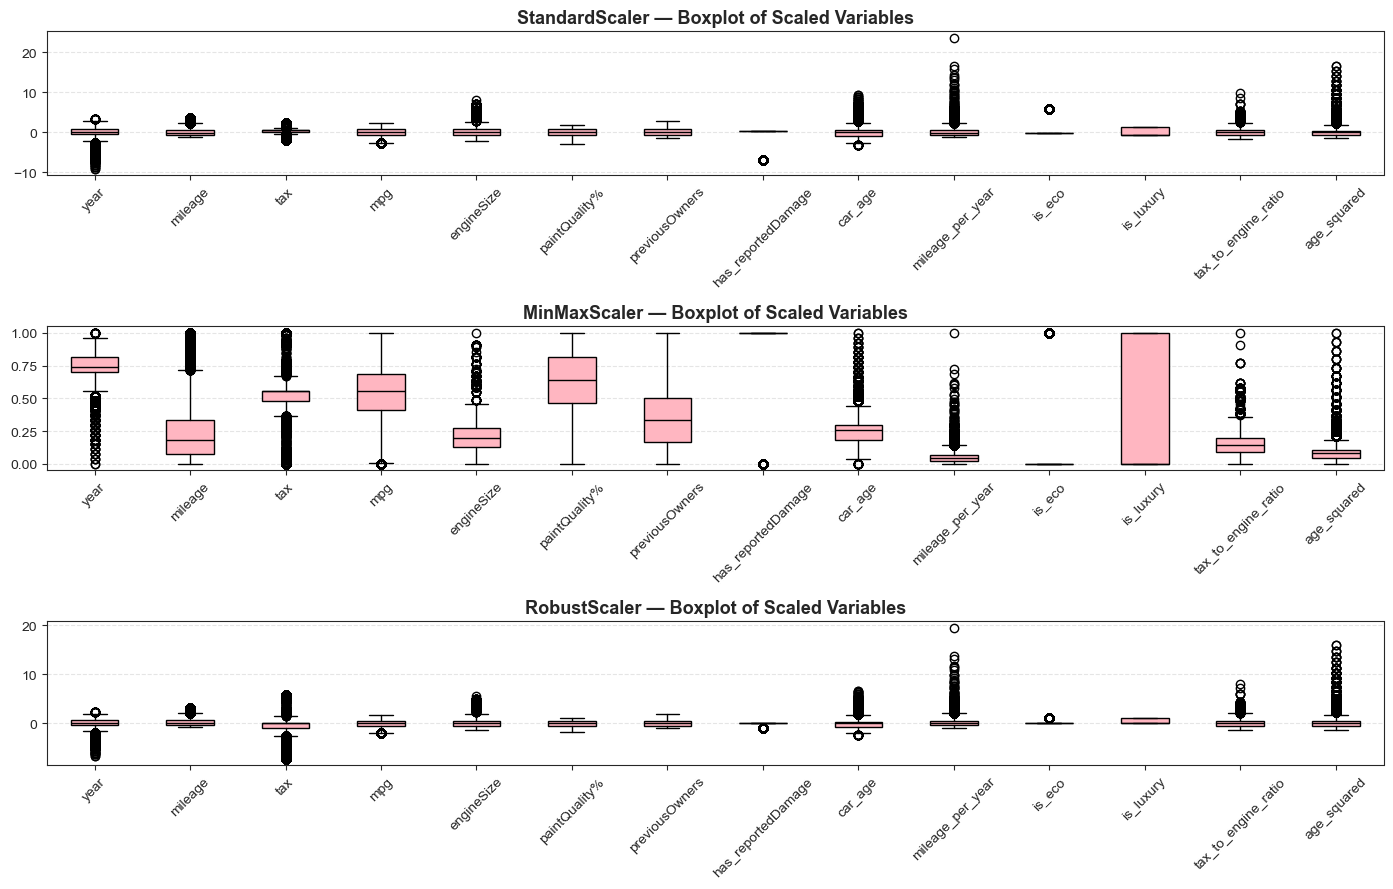

In [66]:
sns.set_style('ticks')

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 9))

if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]

for ax, (name, scaler) in zip(axes, scalers.items()):
    scaled = scaler.fit_transform(X_train_num)
    df_scaled = pd.DataFrame(scaled, columns=X_train_num.columns, index=X_train_num.index)

    ax.boxplot(
        df_scaled.values,
        labels=df_scaled.columns,
        patch_artist=True,  
        boxprops=dict(facecolor="#FFB6C1", color="black"),  
        medianprops=dict(color="black"),                   
        whiskerprops=dict(color="black"),                  
        capprops=dict(color="black")                       
    )
    ax.set_title(f"{name} — Boxplot of Scaled Variables", fontsize=13, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


After comparing the results of different scaling methods through boxplots, the **StandardScaler** was selected as the most appropriate transformation for the project.

As shown in the visual comparison, MinMaxScaler compresses most variables towards the lower end of the scale (0–1 range) due to the presence of strong outliers, which distorts the original data distribution. In contrast, StandardScaler standardizes each feature by removing the mean and scaling to unit variance, resulting in more balanced and normally distributed variables without excessively flattening the data.

Normalizing the numerical data using the **StandardScaler** from sklearn. As the end result, the data obtained has 0 mean and 1 standard-deviation.

In [67]:
#call function
scaler = StandardScaler()

#fit to training data
scaler.fit(X_train_num)

#transform the data
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

#show results
X_train_num_scaled

array([[-0.04027029,  0.01830911, -2.03072856, ..., -0.73378027,
        -1.71403509, -0.07704602],
       [-0.95698755,  0.70670766, -1.69348005, ..., -0.73378027,
        -1.49446574,  0.74800442],
       [ 0.87644697, -0.1448974 ,  0.49863524, ..., -0.73378027,
         1.57950525, -0.71875192],
       ...,
       [-1.41534618, -0.22793229, -2.03072856, ..., -0.73378027,
        -1.71403509,  1.22928384],
       [-0.49862892,  0.44411164, -1.69348005, ..., -0.73378027,
        -1.27489638,  0.31256113],
       [ 0.87644697, -0.89308495,  0.41432311, ..., -0.73378027,
         1.46972057, -0.71875192]])

In [68]:
# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,has_reportedDamage,car_age,mileage_per_year,is_eco,is_luxury,tax_to_engine_ratio,age_squared
carID,,,,,,,,,,,,,,
54985,-0.040270,0.018309,-2.030729,1.700915,0.266064,-0.317643,1.397768,0.143982,0.040270,0.119297,5.823022,-0.733780,-1.714035,-0.077046
26205,-0.956988,0.706708,-1.693480,1.087492,0.635525,-0.366392,-0.699837,0.143982,0.956988,0.543922,-0.171732,-0.733780,-1.494466,0.748004
34283,0.876447,-0.144897,0.498635,-0.945566,-1.211780,-0.122648,1.397768,0.143982,-0.876447,0.258754,-0.171732,-0.733780,1.579505,-0.718752
35019,-0.956988,1.270530,1.341757,-0.752776,0.820255,0.121095,1.397768,0.143982,0.956988,1.095052,-0.171732,1.362806,0.377102,0.748004
35554,-0.040270,-0.081566,0.751572,-0.305854,2.482829,1.047320,-1.399039,0.143982,0.040270,-0.000025,-0.171732,1.362806,-0.506404,-0.077046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41593,0.876447,-0.946662,0.450675,-2.184696,2.482829,0.949823,1.397768,0.143982,-0.876447,-0.972802,-0.171732,1.362806,-0.637005,-0.718752
19620,0.876447,-0.563712,0.414323,-1.506410,0.635525,0.316090,-0.000635,0.143982,-0.876447,-0.384569,-0.171732,-0.733780,-0.122157,-0.718752
54953,-1.415346,-0.227932,-2.030729,1.236467,-1.211780,1.437309,0.698566,0.143982,1.415346,-0.442726,-0.171732,-0.733780,-1.714035,1.229284


The scaling of the validation set should only consider information gained from the training data. 

In [69]:
X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)
X_val_num_scaled.head()

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,has_reportedDamage,car_age,mileage_per_year,is_eco,is_luxury,tax_to_engine_ratio,age_squared
carID,,,,,,,,,,,,,,
32153,0.418088,-0.723570,0.414323,0.596754,0.081333,-1.341366,1.397768,0.143982,-0.418088,-0.707134,-0.171732,-0.733780,0.158762,-0.420817
14216,-1.873705,3.631273,-1.512925,0.693149,0.635525,-0.025151,1.397768,0.143982,1.873705,2.687443,-0.171732,1.362806,-1.376913,1.756399
54177,2.709881,0.088581,-2.030729,1.236467,-1.211780,0.511084,-0.000635,0.143982,-2.709881,3.102218,-0.171732,-0.733780,-1.714035,-1.452130
65762,-0.498629,-0.474659,-1.524856,-0.139353,-0.472858,1.729802,1.397768,0.143982,0.498629,-0.547315,-0.171732,-0.733780,-1.243529,0.312561
25918,-0.040270,0.163608,-1.693480,0.570465,-1.211780,1.681053,-1.399039,0.143982,0.040270,0.292887,-0.171732,-0.733780,-1.274896,-0.077046


 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Categorical Variables Selection
 <h3>

In [70]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:#if p<alpha we reject the null and there is a relationship so the var is important for prediction
        result="{0} is IMPORTANT for Prediction".format(var)#
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)#independent H0
    print(result)

for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)

Brand is IMPORTANT for Prediction
model is IMPORTANT for Prediction
transmission is IMPORTANT for Prediction
fuelType is IMPORTANT for Prediction
hasDamage is IMPORTANT for Prediction
mileage_bin is IMPORTANT for Prediction


According to chi-square, we should not discard any variable.

 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Numerical Variables Selection
 <h3>

### **Correlations**

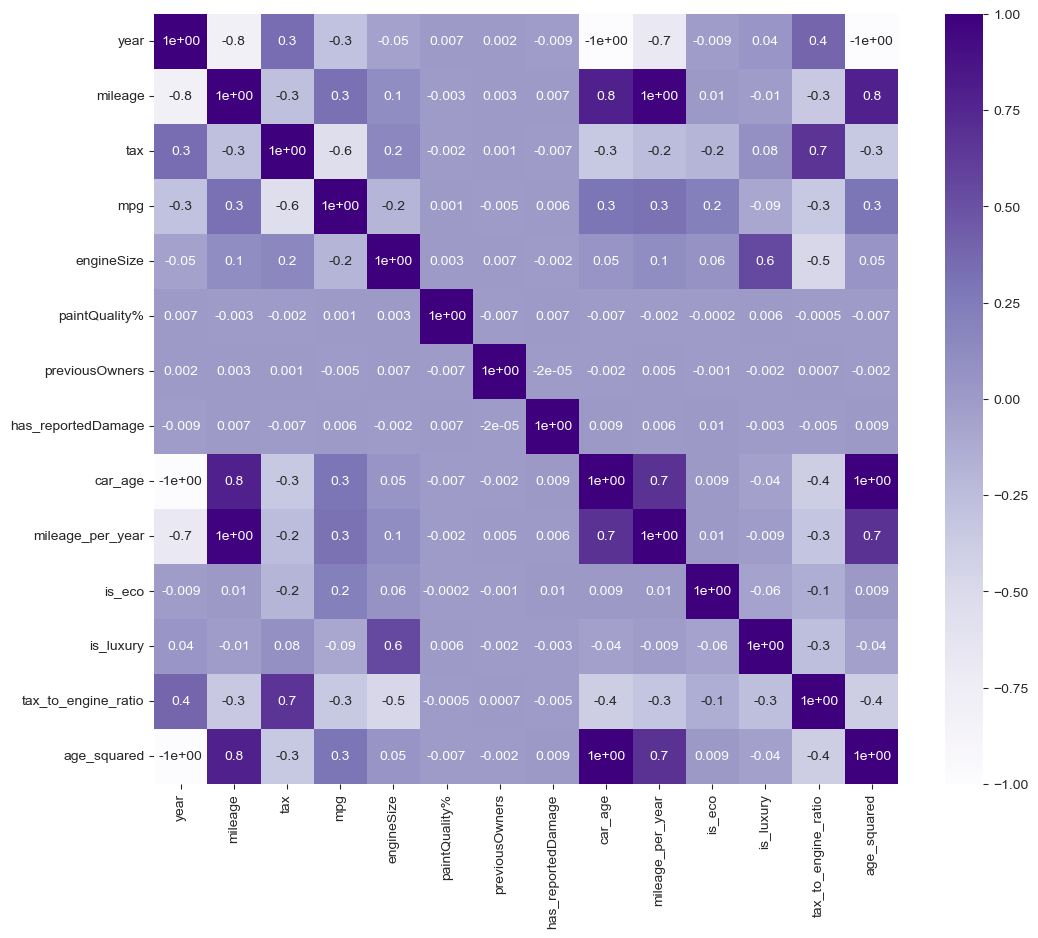

In [71]:
cor_spearman = X_train_num_scaled.corr(method ='spearman')
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Purples, fmt='.1')
    plt.show()
cor_heatmap(cor_spearman)

We can conclude that:
- We need to use other feature selection techniques to get more insights.
- There are three pairs of variables highly correlated, namely:
    - 'mileage' vs 'car_age' (0.8) <br>
    - 'mileage' vs 'age_squared' (0.8) <br>
    - 'mileage_per_year' vs 'car_age' (0.7) <br>
    - 'mileage' vs 'year' (0.7) <br>
    - 'tax' vs 'tax_engine_ratio' (0.6) <br>

### **RFE**

In [72]:
y_train_log=np.log(y_train)
y_val_log=np.log(y_val)

Before RFE, we will check if the training and validation instances of the target variable are similiar in statistical metrics. If they behave in close proximity it means the predictions are reasonable.

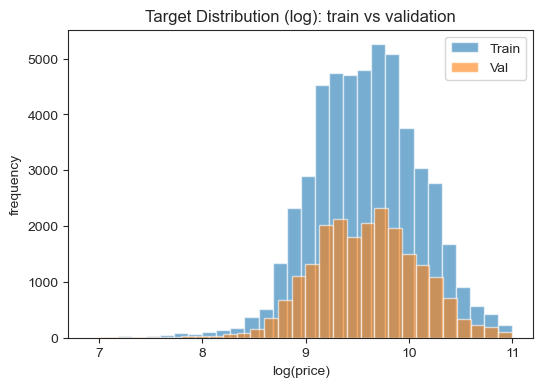

In [73]:
plt.figure(figsize=(6,4))
plt.hist(np.log(y_train), bins=30, alpha=0.6, label="Train")
plt.hist(np.log(y_val), bins=30, alpha=0.6, label="Val")
plt.legend()
plt.title("Target Distribution (log): train vs validation")
plt.xlabel("log(price)")
plt.ylabel("frequency")
plt.show()

This plot shows the distribution of the logarithm of car prices (`log(price)`) for both the training and validation sets. After applying the logarithmic transformation, the target variable follows an approximately normal distribution, which confirms that the transformation successfully reduced the original right skewness typical of raw price data. Both the train and validation sets exhibit very similar shapes and ranges, suggesting that the data split preserved the underlying price distribution, a good sign for model generalization. The concentration of most values between `log(price)` ~ 8.5 and 10.5 indicates that the majority of cars are within a consistent mid-range price segment, while very cheap or very expensive cars are rare.

We tried RFECV and normal RFE for the following results:

In [74]:
#no of features
nof_list=np.arange(1,len(X_train_num_scaled.columns)+1)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LinearRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train_log)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train_log)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train_log)
    train_score_list.append(train_score)
    
    #storing results on validation data
    val_score = model.score(X_val_rfe,y_val_log)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 11
Score with 11 features: 0.806800


In [75]:
def optimal_rfe(X, y, scoring='r2', cv=5, verbose=True):

    model = LinearRegression()
    n_features = X.shape[1]
    scores = []

    if verbose:
        print("Trying features")

    for n in range(1, n_features + 1):
        rfe = RFE(model, n_features_to_select=n)
        X_rfe = rfe.fit_transform(X, y)
        score = np.mean(cross_val_score(model, X_rfe, y, scoring=scoring, cv=cv))
        scores.append(score)

        if verbose:
            print(f"{n:2d} features -> {scoring}: {score:.4f}")

    best_n = np.argmax(scores) + 1
    best_score = scores[best_n - 1]

    best_rfe = RFE(model, n_features_to_select=best_n)
    best_rfe.fit(X, y)

    feature_ranking = (
        {feature: rank for feature, rank in zip(X.columns, best_rfe.ranking_)}
        if hasattr(X, "columns")
        else None
    )

    if verbose:
        print("\nBest number of features:", best_n)
        print("Best average score:", round(best_score, 4))
        if feature_ranking:
            print("Selected features:", X.columns[best_rfe.support_].tolist())

    return best_rfe, best_n, best_score, feature_ranking

optimal_rfe(X_train_num_scaled, y_train_log, scoring='r2', cv=5, verbose=True)

Trying features
 1 features -> r2: 0.3707
 2 features -> r2: 0.7047
 3 features -> r2: 0.7563
 4 features -> r2: 0.7915
 5 features -> r2: 0.7915
 6 features -> r2: 0.7915
 7 features -> r2: 0.7968
 8 features -> r2: 0.8062
 9 features -> r2: 0.8066
10 features -> r2: 0.8068
11 features -> r2: 0.8068
12 features -> r2: 0.8068
13 features -> r2: 0.8068
14 features -> r2: 0.8067

Best number of features: 10
Best average score: 0.8068
Selected features: ['year', 'mileage', 'mpg', 'engineSize', 'car_age', 'mileage_per_year', 'is_eco', 'is_luxury', 'tax_to_engine_ratio', 'age_squared']


(RFE(estimator=LinearRegression(), n_features_to_select=np.int64(10)),
 np.int64(10),
 np.float64(0.8067865924950592),
 {'year': np.int64(1),
  'mileage': np.int64(1),
  'tax': np.int64(5),
  'mpg': np.int64(1),
  'engineSize': np.int64(1),
  'paintQuality%': np.int64(2),
  'previousOwners': np.int64(3),
  'has_reportedDamage': np.int64(4),
  'car_age': np.int64(1),
  'mileage_per_year': np.int64(1),
  'is_eco': np.int64(1),
  'is_luxury': np.int64(1),
  'tax_to_engine_ratio': np.int64(1),
  'age_squared': np.int64(1)})

### **LASSO**

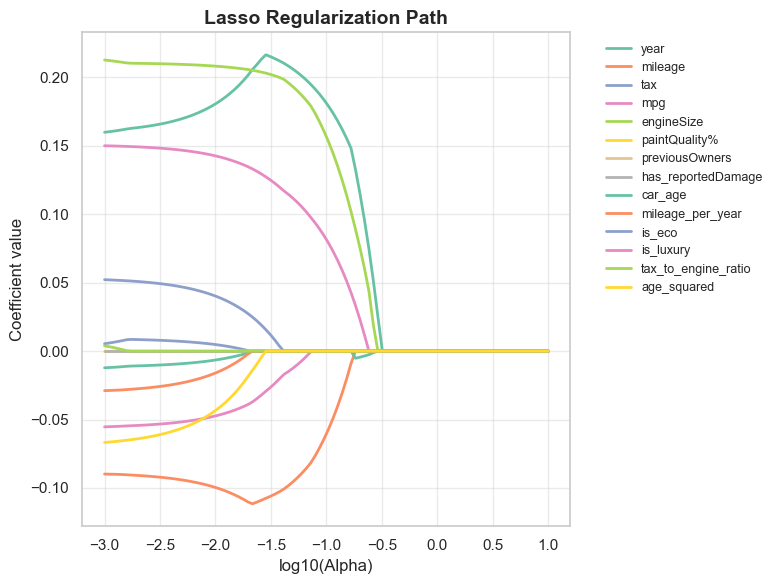

In [76]:
sns.set_theme(style="whitegrid")

alphas, coefs, _ = lasso_path(X_train_num_scaled, y_train_log, alphas=np.logspace(-3, 1, 100))

palette = sns.color_palette("Set2", n_colors=len(X_train_num_scaled.columns))

plt.figure(figsize=(8,6))
for i, (col, color) in enumerate(zip(X_train_num_scaled.columns, palette)):
    plt.plot(np.log10(alphas), coefs[i], label=col, color=color, linewidth=2)

plt.xlabel('log10(Alpha)', fontsize=12)
plt.ylabel('Coefficient value', fontsize=12)
plt.title('Lasso Regularization Path', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, frameon=False)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

When α is small, most coefficients are non-zero, meaning that the model includes almost all variables. As α increases, the L1 penalty forces less relevant or redundant variables to shrink toward zero, progressively simplifying the model.

In this case, the first features to be eliminated are those with weaker relationships to the target, such as `paintQuality%`, `previousOwners`, and `hasDamage`.
Conversely, the most persistent variables (`year`, `engineSize`, and `is_luxury`) remain active for a wide range of α values, indicating that they are the strongest predictors of car price.

In [77]:
reg=LassoCV()

In [78]:
reg.fit(X_train_num_scaled, y_train_log)

LassoCV()

In [79]:
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
coef

year                   0.167979
mileage               -0.089406
tax                    0.001725
mpg                   -0.056127
engineSize             0.215327
paintQuality%         -0.000970
previousOwners         0.000499
has_reportedDamage     0.000254
car_age               -0.002488
mileage_per_year      -0.029670
is_eco                 0.053064
is_luxury              0.150614
tax_to_engine_ratio    0.008232
age_squared           -0.068646
dtype: float64

In [80]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 14 variables and eliminated the other 0 variables


In [81]:
coef.sort_values()

mileage               -0.089406
age_squared           -0.068646
mpg                   -0.056127
mileage_per_year      -0.029670
car_age               -0.002488
paintQuality%         -0.000970
has_reportedDamage     0.000254
previousOwners         0.000499
tax                    0.001725
tax_to_engine_ratio    0.008232
is_eco                 0.053064
is_luxury              0.150614
year                   0.167979
engineSize             0.215327
dtype: float64

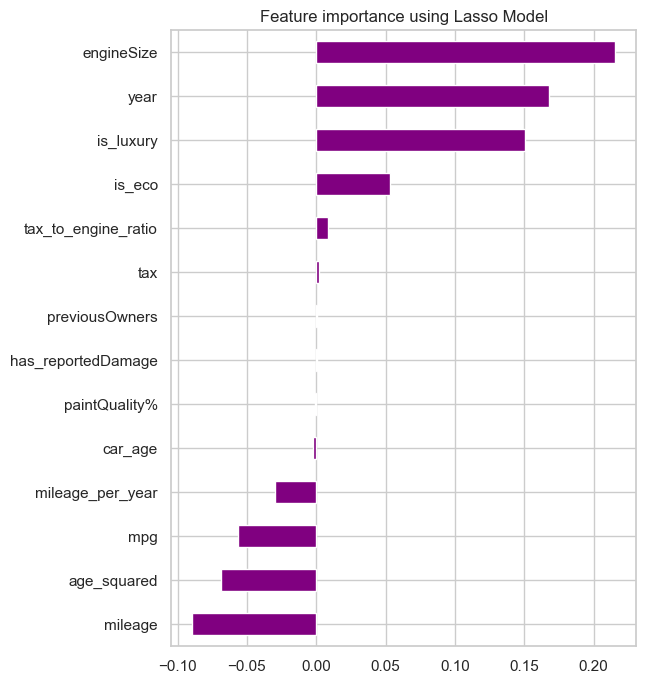

In [82]:
sns.set_style('whitegrid')
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(6,8))
    imp_coef.plot(kind = "barh", color='purple')
    plt.title("Feature importance using " + name + " Model")
    plt.show()
plot_importance(coef,'Lasso')

According to Lasso, we should not remove any variable as no variable seems insignificant (**coefficient == 0**). `paintQuality%`, `hasDamage`, `tax` and `previousOwners` seem less important than their remaining predictors.

In [83]:
metric_features

['year',
 'mileage',
 'tax',
 'mpg',
 'engineSize',
 'paintQuality%',
 'previousOwners',
 'has_reportedDamage',
 'car_age',
 'mileage_per_year',
 'is_eco',
 'is_luxury',
 'tax_to_engine_ratio',
 'age_squared']

### **Regression Tree Feature Importance**

Shape do X_train[metric_features]: (50616, 14)


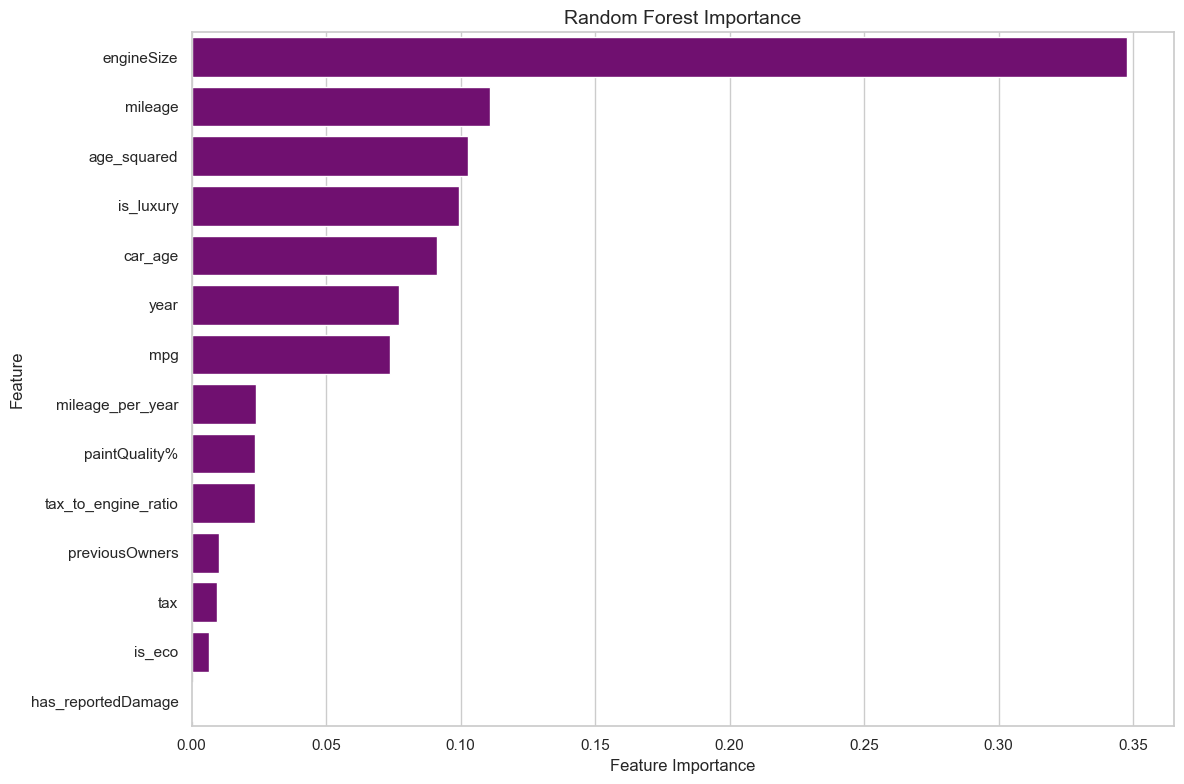

In [84]:

print("Shape do X_train[metric_features]:", X_train[metric_features].shape)


sample_size = min(5000, len(X_train))   # se o dataset for mais pequeno, usa tudo
X_sample = X_train[metric_features].sample(n=sample_size, random_state=42)
y_sample = y_train.loc[X_sample.index]


rf = RandomForestRegressor(
    criterion='squared_error',
    n_estimators=100,     # podes baixar para 50 se ainda for pesado
    max_depth=None,       # podes pôr 10 ou 15 para acelerar mais
    random_state=42,
    n_jobs=-1             # deixa usar os cores todos outra vez
)

rf.fit(X_sample, y_sample)

importances = rf.feature_importances_

# DataFrame com importâncias
imp_df = pd.DataFrame({
    'Feature': metric_features,
    'Importance': importances
})

# Ordenar por importância
imp_df = imp_df.sort_values('Importance', ascending=False)

# Se quiseres só as top 20:
top_n = 20
imp_top = imp_df.head(top_n)

# Gráfico
plt.figure(figsize=(12, 8))
sns.barplot(
    data=imp_top,
    y='Feature',
    x='Importance',
    color='purple'
)
plt.title('Random Forest Importance', fontsize=14)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


Let us assign a threshold on importance below 0.05. As such, according to Random Forest Sqared Error criteria, we discard `paintQuality%`, `has_reportedDamage`, `tax`, `is_eco`, `previousOwners`, `mileage_per_year` and `tax_to_engine_ratio`.

<hr>

### Numerical Data

| Predictor | Spearman | RFE LR | Lasso | Random Forest | What to do? (One possible way to "solve") | 
| --- | --- | --- |--- |---|---|
| year | Keep? | Keep | Keep | Keep | Include in the model |
| engineSize | Keep | Keep | Keep | Keep | Include in the model |
| is_luxury | Keep | Keep | Keep | Keep | Include in the model |
| is_eco | Keep | Keep | Keep | Discard | Include in the model |
| tax | Keep? | Keep | Discard | Discard | Discard |
| previousOwners | Keep | Discard | Discard | Discard | Discard |
| paintQuality% | Keep | Keep | Discard | Discard | Discard |
| car_age | Keep? | Keep | Discard | Keep | Include in the model |
| mpg | Keep | Keep | Keep | Keep | Include in the model |
| mileage_per_year | Keep? | Discard | Keep | Discard | Discard |
| mileage | Keep? | Keep | Keep | Keep | Include in the model |
| tax_to_engine_ratio | Keep? | Keep | Keep | Discard | Include in the model |
| age_squared | Keep? | Keep | Keep | Keep | Include in the model |
| has_reportedDamage | Keep | Keep | Discard | Discard | Discard |


<hr>


### Categorical Data

| Predictor | Chi-Square | 
| --- | --- | 
| Brand | Keep |  
| model | Keep | 
| transmission | Keep | 
| fuelType | Keep|
| mileage_bin | Keep |


<hr>

<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
5. Machine Learning Model
</h2>

Selecting the desired features.

In [85]:
X_train_selected = X_train[['Brand','mileage_bin','model','fuelType', 'transmission', 'year', 'mileage','mileage_per_year', 'mpg', 'engineSize', 'car_age', 'is_luxury','is_eco', 'tax_to_engine_ratio']]
X_val_selected = X_val[['Brand','mileage_bin','model','fuelType', 'transmission', 'year', 'mileage','mileage_per_year','mpg', 'engineSize', 'car_age', 'is_luxury','is_eco', 'tax_to_engine_ratio']]
X_test_selected = X_test[['Brand','mileage_bin','model', 'fuelType','transmission', 'year', 'mileage','mileage_per_year', 'mpg', 'engineSize', 'car_age', 'is_luxury','is_eco', 'tax_to_engine_ratio']]

Function to evaluate each model created:

In [86]:
def evaluate_model(model, X_train, X_val, y_train, y_val):
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    print("Validation set:")
    print("R²:", r2_score(y_val, y_pred_val))
    print("MAE:", mean_absolute_error(y_val, y_pred_val))
    print("RMSE:", root_mean_squared_error(y_val, y_pred_val))
    print("\nTraining set:")
    print("R²:", r2_score(y_train, y_pred_train))
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("RMSE:", root_mean_squared_error(y_train, y_pred_train))
    print("-" * 60)

In [87]:
def evaluate_model_original_scale(model, X_train, X_val, y_train, y_val):
    # predições em log
    y_pred_train_log = model.predict(X_train)
    y_pred_val_log = model.predict(X_val)

    # voltar para a escala original
    y_pred_train = np.exp(y_pred_train_log)
    y_pred_val = np.exp(y_pred_val_log)

    print("Validation set:")
    print("R²:", r2_score(y_val, y_pred_val))
    print("MAE:", mean_absolute_error(y_val, y_pred_val))
    print("RMSE:", root_mean_squared_error(y_val, y_pred_val))
    print("\nTraining set:")
    print("R²:", r2_score(y_train, y_pred_train))
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("RMSE:", root_mean_squared_error(y_train, y_pred_train))
    print("-" * 60)


In [88]:
#JA FAZEMOS CV NAS PESQUISAS DE HIPER PARAMETROS POREM ESTA E A FUNCAO CASO SEJ APRECISO
# def avg_score(model):
#     # KFold para regressão (não precisa ser stratified)
#     kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
#     score_train = []
#     score_val = []
#     timer = []
    
#     for train_index, val_index in kf.split(X):
#         X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#         y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
#         begin = time.perf_counter()
#         model.fit(X_train, y_train)
#         end = time.perf_counter()
        
#         # MAE para train
#         train_pred = model.predict(X_train)
#         value_train = mean_absolute_error(y_train, train_pred)
        
#         # MAE para validation
#         val_pred = model.predict(X_val)
#         value_val = mean_absolute_error(y_val, val_pred)
        
#         score_train.append(value_train)
#         score_val.append(value_val)
#         timer.append(end - begin)
    
#     avg_time = round(np.mean(timer), 3)
#     avg_train = round(np.mean(score_train), 3)
#     avg_val = round(np.mean(score_val), 3)
    
#     std_time = round(np.std(timer), 2)
#     std_train = round(np.std(score_train), 2)
#     std_val = round(np.std(score_val), 2)
    
#     return (f"{avg_time}+/-{std_time}", 
#             f"{avg_train}+/-{std_train}",
#             f"{avg_val}+/-{std_val}")

Data pre-processing transformation before model application.

In [89]:
X_test_selected.columns

Index(['Brand', 'mileage_bin', 'model', 'fuelType', 'transmission', 'year',
       'mileage', 'mileage_per_year', 'mpg', 'engineSize', 'car_age',
       'is_luxury', 'is_eco', 'tax_to_engine_ratio'],
      dtype='object')

In [90]:
#numerical_features = ['mileage','mpg','tax_to_engine_ratio','car_age','year','engineSize','mileage_per_year']

In [91]:
'''
numerical_pipeline = Pipeline(steps=[
    ('scaler', RobustScaler())
])

low_card_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

high_card_pipeline = Pipeline(steps=[
    ('target', TargetEncoder(smooth=12)) 
])


# 3. CONSTRUÇÃO DO COLUMNTRAINFORMER (preprocessor_v2)
preprocessor_v2 = ColumnTransformer(
    transformers=[
        ('num_pipe', numerical_pipeline, numerical_features),
        ('low_card_pipe', low_card_pipeline, ['transmission', 'fuelType','mileage_bin']),
        ('high_card_pipe', high_card_pipeline, ['model','Brand']),
        ('passthrough', 'passthrough', ['is_luxury','is_eco'])
    ],
    remainder='drop',
    n_jobs=-1
)
'''

"\nnumerical_pipeline = Pipeline(steps=[\n    ('scaler', RobustScaler())\n])\n\nlow_card_pipeline = Pipeline(steps=[\n    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))\n])\n\nhigh_card_pipeline = Pipeline(steps=[\n    ('target', TargetEncoder(smooth=12)) \n])\n\n\n# 3. CONSTRUÇÃO DO COLUMNTRAINFORMER (preprocessor_v2)\npreprocessor_v2 = ColumnTransformer(\n    transformers=[\n        ('num_pipe', numerical_pipeline, numerical_features),\n        ('low_card_pipe', low_card_pipeline, ['transmission', 'fuelType','mileage_bin']),\n        ('high_card_pipe', high_card_pipeline, ['model','Brand']),\n        ('passthrough', 'passthrough', ['is_luxury','is_eco'])\n    ],\n    remainder='drop',\n    n_jobs=-1\n)\n"

### Elastic Net

In [92]:
# elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=1000, random_state=42)

# EN_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('elasticnet', elastic_model)
# ])

# EN_pipeline.fit(X_train_selected, y_train)
# evaluate_model(EN_pipeline, X_train_selected, X_val, y_train, y_val)


### Random Forest

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_v2),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))
])

param_grid_pipeline = {
    'regressor__n_estimators': [100, 200,300], 
    'regressor__max_depth': [6, 10],
    'regressor__min_samples_split': [20, 40, 60],
    'regressor__min_samples_leaf': [10, 15, 20],
    'regressor__max_features': ['sqrt', 'log2']
}

# Create GridSearchCV with the pipeline
r_search = RandomizedSearchCV(
    rf_pipeline,
    param_grid_pipeline,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_absolute_error',
    verbose=2,
    n_jobs=-1,  # Use all available cores
    n_iter=20
    
)

# Fit on train_val data
print("Running RandomizedSearchCV with Pipeline...")
r_search.fit(X_train_selected, y_train_log)

print("\nRandomizedSearchCV Results:")
best_rf_model = r_search.best_estimator_
print(f"Best parameters: {r_search.best_params_}")
print(f"Best CV score: {-r_search.best_score_:.4f}")

# Previsões
y_pred_log = best_rf_model.predict(X_val_selected) 
y_pred_original = np.exp(y_pred_log)

Running RandomizedSearchCV with Pipeline...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

RandomizedSearchCV Results:
Best parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 20, 'regressor__min_samples_leaf': 10, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 10}
Best CV score: 0.1027


In [94]:
evaluate_model(best_rf_model, X_train_selected, X_val_selected, y_train_log, y_val_log)
evaluate_model_original_scale(best_rf_model,X_train_selected,X_val_selected,y_train,y_val)

Validation set:
R²: 0.9266722572769671
MAE: 0.10292307963352774
RMSE: 0.1399404965867431

Training set:
R²: 0.9339435100309413
MAE: 0.09893264682744732
RMSE: 0.13361004465267803
------------------------------------------------------------
Validation set:
R²: 0.9117671238445011
MAE: 1686.6887690790186
RMSE: 2629.319522951694

Training set:
R²: 0.9184535124746761
MAE: 1616.1227566699622
RMSE: 2516.6704192821576
------------------------------------------------------------


In [95]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline

# Ridge com o MESMO preprocessor
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_v2),
    ('regressor', Ridge(alpha=100))
])

ridge_pipeline.fit(X_train_selected, y_train_log)

# RF já está treinado
rf_pipeline = best_rf_model

# Ensemble dos dois pipelines
ensemble = VotingRegressor([
    ('rf', rf_pipeline),
    ('ridge', ridge_pipeline)
], weights=[0.6, 0.4])

# IMPORTANTE: O ensemble não precisa de fit porque os modelos já estão treinados
# Fazemos predict diretamente
y_pred_rf = rf_pipeline.predict(X_val_selected)
y_pred_ridge = ridge_pipeline.predict(X_val_selected)

# Weighted average manual
y_pred_ensemble_log = 0.8 * y_pred_rf + 0.2 * y_pred_ridge
y_pred_ensemble = np.exp(y_pred_ensemble_log)

# Métricas
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae_ensemble = mean_absolute_error(y_val, y_pred_ensemble)
rmse_ensemble = np.sqrt(mean_squared_error(y_val, y_pred_ensemble))
r2_ensemble = r2_score(y_val, y_pred_ensemble)

print("Ensemble (RF 60% + Ridge 40%):")
print(f"MAE:  {mae_ensemble:.2f}")
print(f"RMSE: {rmse_ensemble:.2f}")
print(f"R²:   {r2_ensemble:.4f}")

Ensemble (RF 60% + Ridge 40%):
MAE:  1709.37
RMSE: 2652.31
R²:   0.9102


In [96]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from scipy.stats import uniform, randint

hgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_v2),
    ('regressor', HistGradientBoostingRegressor(random_state=42))
])

param_grid_pipeline = {
    'regressor__max_iter': randint(200, 1000),
    'regressor__learning_rate': uniform(0.01, 0.09),
    'regressor__max_depth': randint(4, 10),
    'regressor__min_samples_leaf': randint(20, 90),
    'regressor__l2_regularization': uniform(0, 2),
    'regressor__max_bins': [127, 255],
    'regressor__max_leaf_nodes': randint(20, 40),
    'regressor__early_stopping': [True],
    'regressor__validation_fraction': uniform(0.1, 0.2),
    'regressor__n_iter_no_change': [20, 30, 50],
    'regressor__tol': uniform(1e-6, 1e-5),
}

# Create GridSearchCV with the pipeline
r_search = RandomizedSearchCV(
    hgb_pipeline,
    param_grid_pipeline,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_absolute_error',
    verbose=2,
    n_jobs=-1,  # Use all available cores
    n_iter=20
    
)

# Fit on train_val data
print("Running RandomizedSearchCV with Pipeline...")
r_search.fit(X_train_selected, y_train_log)

print("\nRandomizedSearchCV Results:")
best_hgb_model = r_search.best_estimator_
print(f"Best parameters: {r_search.best_params_}")
print(f"Best CV score: {-r_search.best_score_:.4f}")

# Previsões
y_pred_log = best_hgb_model.predict(X_val_selected) 
y_pred_original = np.exp(y_pred_log)

Running RandomizedSearchCV with Pipeline...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


  File "C:\Users\mariana\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\mariana\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mariana\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mariana\anaconda3\Lib\sub


RandomizedSearchCV Results:
Best parameters: {'regressor__early_stopping': True, 'regressor__l2_regularization': np.float64(0.3252338786897826), 'regressor__learning_rate': np.float64(0.09198344660444581), 'regressor__max_bins': 127, 'regressor__max_depth': 9, 'regressor__max_iter': 793, 'regressor__max_leaf_nodes': 38, 'regressor__min_samples_leaf': 88, 'regressor__n_iter_no_change': 50, 'regressor__tol': np.float64(1.0191765518355597e-05), 'regressor__validation_fraction': np.float64(0.11654968400706123)}
Best CV score: 0.0794


In [97]:
evaluate_model(best_hgb_model, X_train_selected, X_val_selected, y_train_log, y_val_log)
evaluate_model_original_scale(best_hgb_model,X_train_selected,X_val_selected,y_train,y_val)

Validation set:
R²: 0.9550756443753311
MAE: 0.07866797388055533
RMSE: 0.10953431102768153

Training set:
R²: 0.9670522819479158
MAE: 0.07013341372576777
RMSE: 0.09436132556160523
------------------------------------------------------------
Validation set:
R²: 0.9482381002732297
MAE: 1291.8660823755322
RMSE: 2013.8784354319453

Training set:
R²: 0.958581574869376
MAE: 1159.4694372460683
RMSE: 1793.5789802949093
------------------------------------------------------------


In [98]:
from sklearn.ensemble import GradientBoostingRegressor


gbr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_v2),
    ('regressor', GradientBoostingRegressor(random_state=42,loss='absolute_error'))
])

param_grid_pipeline = {
   'regressor__n_estimators': [300, 500, 700],           
    'regressor__learning_rate': [0.01, 0.05, 0.1],          
    'regressor__max_depth': [3, 4, 5],                      
    'regressor__min_samples_split': [20, 40, 60],           
    'regressor__min_samples_leaf': [10, 15, 20],            
    'regressor__max_features': ['sqrt', 'log2'],            
    'regressor__subsample': [0.7, 0.8, 0.9], 
}

# Create RandomizedSearchCV with the pipeline
r_search = RandomizedSearchCV(
    gbr_pipeline,
    param_distributions=param_grid_pipeline,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_absolute_error',
    verbose=2,
    n_jobs=-1,  # Use all available cores
    n_iter=20
)

# Fit on train_val data
print("Running RandomizedSearchCV with Pipeline...")
r_search.fit(X_train_selected, y_train_log)

print("\nRandomizedSearchCV Results:")
best_gbr_model = r_search.best_estimator_
print(f"Best parameters: {r_search.best_params_}")
print(f"Best CV score: {-r_search.best_score_:.4f}")

# Previsões
y_pred_log = best_gbr_model.predict(X_val_selected) 
y_pred_original = np.exp(y_pred_log)

Running RandomizedSearchCV with Pipeline...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

RandomizedSearchCV Results:
Best parameters: {'regressor__subsample': 0.7, 'regressor__n_estimators': 700, 'regressor__min_samples_split': 60, 'regressor__min_samples_leaf': 20, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 5, 'regressor__learning_rate': 0.1}
Best CV score: 0.0845


In [99]:
evaluate_model_original_scale(best_gbr_model,X_train_selected,X_val_selected,y_train,y_val)

Validation set:
R²: 0.9402865058856482
MAE: 1385.2645223641537
RMSE: 2163.039200703353

Training set:
R²: 0.9454796655619947
MAE: 1290.2999746537573
RMSE: 2057.7990881849355
------------------------------------------------------------


In [100]:
y_test_log = best_gbr_model.predict(X_test)
y_test_original=np.exp(y_test_log)
y_test_original = pd.Series(y_test_original, name="price", index=X_test.index)
y_test_original.to_csv("y_test.csv", index=True)

### SVM

In [101]:

svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_v2),
    ('regressor', SVR(kernel='rbf', C=5, gamma=0.05)) 
])

svr_pipeline.fit(X_train_selected, y_train_log)
evaluate_model(svr_pipeline, X_train_selected, X_val_selected, y_train_log, y_val_log)


Validation set:
R²: 0.9289143672777346
MAE: 0.10207615922594566
RMSE: 0.13778443804937796

Training set:
R²: 0.9348538431224469
MAE: 0.09899711751484569
RMSE: 0.13268620199807585
------------------------------------------------------------


In [102]:
"""y_test2 = svr_pipeline.predict(X_test)
y_test2 = pd.Series(y_test, name="price", index=X_test.index)
y_test2.to_csv("y_test.csv", index=True)"""

'y_test2 = svr_pipeline.predict(X_test)\ny_test2 = pd.Series(y_test, name="price", index=X_test.index)\ny_test2.to_csv("y_test.csv", index=True)'

### Lasso

In [103]:
# from sklearn.linear_model import Lasso
# lasso = Lasso(alpha=1.0, max_iter=10000)

# lasso_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('lasso', lasso)
# ])
# lasso_pipeline.fit(X_train_selected, y_train)
# evaluate_model(lasso_pipeline, X_train, X_val, y_train, y_val)

### Decision tree


In [104]:
# from sklearn.tree import DecisionTreeRegressor

# tree = DecisionTreeRegressor(
#     criterion='squared_error', 
#     max_depth=5,                
#     random_state=42
# )

# tree_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('tree', tree)
# ])

# tree_pipeline.fit(X_train_selected, y_train)
# evaluate_model(tree_pipeline, X_train, X_val, y_train, y_val)

### Stochastic Gradient Descent

In [105]:
# sgd_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', SGDRegressor(
#         max_iter=1000, tol=1e-3, penalty='l2', random_state=42))
# ])

# sgd_pipeline.fit(X_train, y_train)
# evaluate_model(sgd_pipeline, X_train, X_val, y_train, y_val)

### K-Nearest-Neighbors

In [106]:
# knn_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', KNeighborsRegressor(n_neighbors=5, weights='distance', n_jobs=-1))
# ])

# knn_pipeline.fit(X_train, y_train)
# evaluate_model(knn_pipeline, X_train, X_val, y_train, y_val)

### Linear Regression

In [107]:
# linear_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', LinearRegression())
# ])

# linear_pipeline.fit(X_train, y_train)
# evaluate_model(linear_pipeline, X_train, X_val, y_train, y_val)

### Ridge Regression

In [108]:
# ridge_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', Ridge(alpha=1.0, random_state=42))
# ])

# ridge_pipeline.fit(X_train, y_train)
# evaluate_model(ridge_pipeline, X_train, X_val, y_train, y_val)
